# Data Visualization - Python Portion

## Data Cleaning and Transformation: Gabriel's Section

### Importing Libraries

In [ ]:
#@title

# Import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import re



### Data cleaning and preprocessing UN dataset

In [ ]:
#@title

#Load dataset 

#url ="https://raw.githubusercontent.com/angelhumano/viz_project/main/destination_origen_UN_2020_migrant_stock.csv"
url="https://github.com/angelhumano/viz_project/blob/main/destination_origen_UN_2020_migrant_stock.csv?raw=true"

df = pd.read_csv(url, skiprows=9)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (0,2,3,6) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#@title
df1 = df.copy()
df1.shape

(37052, 28)

In [ ]:
#@title
df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Index,"Region, development group, country or area of ...",Notes of destination,Location code of destination,Type of data of destination,"Region, development group, country or area of ...",Location code of origin,1990,1995,2000,...,2010,2015,2020,1990,1995,2000,2005,2010,2015,2020
1,1,WORLD,NaN,900,NaN,WORLD,900,152 986 157,161 289 976,173 230 585,...,113 940 881,128 238 058,145 655 844,75 422 690,79 708 475,85 510 752,93 783 747,107 042 306,119 720 586,134 942 261
2,2,WORLD,NaN,900,NaN,Sub-Saharan Africa,947,15 334 807,16 488 973,15 638 014,...,10 531 120,12 578 348,14 732 802,7 197 963,7 811 167,7 391 439,8 047 927,9 411 604,11 618 863,13 551 736
3,3,WORLD,NaN,900,NaN,Northern Africa and Western Asia,1833,16 365 218,18 069 437,19 437 054,...,14 249 463,18 177 303,20 941 050,7 535 205,8 240 176,8 700 647,9 770 550,11 064 248,14 428 744,16 622 770
4,4,WORLD,NaN,900,NaN,Central and Southern Asia,921,31 104 020,29 069 983,30 897 694,...,24 444 167,27 971 106,31 211 577,14 049 348,13 027 520,13 718 322,14 451 806,16 638 221,18 510 024,20 017 972
5,5,WORLD,NaN,900,NaN,Eastern and South-Eastern Asia,1832,14 774 419,17 860 923,21 440 854,...,15 130 964,17 150 433,18 801 912,7 359 668,8 999 164,10 940 422,13 069 932,15 846 242,18 055 157,19 598 828
6,6,WORLD,NaN,900,NaN,Latin America and the Caribbean,1830,15 273 399,19 669 704,24 628 700,...,16 857 618,17 582 139,20 697 275,7 728 710,9 943 541,12 446 161,14 842 839,17 780 032,18 623 861,22 193 206
7,7,WORLD,NaN,900,NaN,Oceania (excluding Australia and New Zealand),1835,272 517,313 061,375 176,...,214 866,240 815,273 803,138 894,160 703,191 857,208 246,227 037,254 405,291 478
8,8,WORLD,NaN,900,NaN,Australia and New Zealand,927,689 030,758 234,871 660,...,573 939,622 696,693 842,353 679,391 525,450 533,502 354,575 326,633 506,711 082
9,9,WORLD,NaN,900,NaN,Europe and Northern America,1829,50 532 413,51 582 164,52 877 703,...,27 337 252,28 229 706,31 770 385,26 827 879,27 433 406,28 201 599,29 166 292,31 343 852,32 362 696,35 831 236


### Rename columns

In [ ]:
 #@title
#Assign column names 
df1.columns = list(df1.iloc[0])
list(df1.columns)

['Index',
 'Region, development group, country or area of destination',
 'Notes of destination',
 'Location code of destination',
 'Type of data of destination',
 'Region, development group, country or area of origin',
 'Location code of origin',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020',
 '1990',
 '1995',
 '2000',
 '2005',
 '2010',
 '2015',
 '2020']

### Delete columns that we do not need

In [ ]:
 #@title
# Delete the columns that we do not need

#Select years for both sexes and drop 

df1 = df1.iloc[1:,1:14]

#Reset index
df1.reset_index(drop=True, inplace= True)
df1.head(5)

#https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index/
#https://stackoverflow.com/a/61661270/15333580 

,"Region, development group, country or area of destination",Notes of destination,Location code of destination,Type of data of destination,"Region, development group, country or area of origin",Location code of origin,1990,1995,2000,2005,2010,2015,2020
0,WORLD,NaN,900,NaN,WORLD,900,152 986 157,161 289 976,173 230 585,191 446 828,220 983 187,247 958 644,280 598 105
1,WORLD,NaN,900,NaN,Sub-Saharan Africa,947,15 334 807,16 488 973,15 638 014,17 274 985,19 942 724,24 197 211,28 284 538
2,WORLD,NaN,900,NaN,Northern Africa and Western Asia,1833,16 365 218,18 069 437,19 437 054,21 867 791,25 313 711,32 606 047,37 563 820
3,WORLD,NaN,900,NaN,Central and Southern Asia,921,31 104 020,29 069 983,30 897 694,33 347 690,41 082 388,46 481 130,51 229 549
4,WORLD,NaN,900,NaN,Eastern and South-Eastern Asia,1832,14 774 419,17 860 923,21 440 854,25 556 983,30 977 206,35 205 590,38 400 740


### Remove regions and leave only countries

In [ ]:
 #@title
#Remove regions and leave only countries
df1 = df1[df1["Type of data of destination"].notna()]

#drop columns "notes of destiantion" and "type of data of destiantion"

df1 = df1.drop(df1.columns[[1,2,3,5]],axis = 1)
print(F"dataframe shape = {df1.shape}")


dataframe shape = (23323, 9)


In [ ]:
#@title
# Rename columns 
cols = ["destination", "origin","1990","1995","2000","2005","2010","2015","2020"]
df1= df1.rename(columns=dict(zip(df1.columns,cols)))
df1


,destination,origin,1990,1995,2000,2005,2010,2015,2020
6509,Burundi,WORLD,333 110,254 853,125 628,192 774,247 321,298 299,344 767
6510,Burundi,Sub-Saharan Africa,272 528,213 186,111 209,175 242,226 957,270 062,311 754
6511,Burundi,Northern Africa and Western Asia,..,..,..,..,..,..,..
6512,Burundi,Central and Southern Asia,..,..,..,..,..,..,..
6513,Burundi,Eastern and South-Eastern Asia,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...
37046,Wallis and Futuna Islands*,French Polynesia*,18,23,28,32,19,15,10
37047,Wallis and Futuna Islands*,Mayotte*,35,44,52,58,41,38,27
37048,Wallis and Futuna Islands*,New Caledonia*,843,975,1 152,1 207,1 093,1 021,1 021
37049,Wallis and Futuna Islands*,Vanuatu,152,165,195,197,138,72,67


In [ ]:
#@title
# Get a list of all countries in the dataset and delete and use to delele the rows that still have regions in the dataset
dest = sorted(df1["destination"].unique())


In [ ]:
#@title
# Remove rows with regions in the column origin
df2 = df1[df1["origin"].isin(dest)]
df2

,destination,origin,1990,1995,2000,2005,2010,2015,2020
6557,Burundi,Belgium,642,621,475,466,497,605,718
6558,Burundi,Democratic Republic of the Congo,36 654,41 447,37 951,99 099,147 611,175 768,199 585
6559,Burundi,France*,321,310,237,232,248,302,358
6560,Burundi,Kenya,186,216,202,502,847,1 032,1 226
6561,Burundi,Rwanda,221 943,160 197,66 415,61 104,54 794,64 363,76 567
...,...,...,...,...,...,...,...,...,...
37045,Wallis and Futuna Islands*,France*,327,461,545,646,795,877,889
37046,Wallis and Futuna Islands*,French Polynesia*,18,23,28,32,19,15,10
37047,Wallis and Futuna Islands*,Mayotte*,35,44,52,58,41,38,27
37048,Wallis and Futuna Islands*,New Caledonia*,843,975,1 152,1 207,1 093,1 021,1 021


### Check deleted regions

In [ ]:
#@title
#Let us check what we just deleted
d = df1[~df1['origin'].isin(dest)]
sorted(d["origin"].unique())

['  Australia and New Zealand',
 '  Caribbean',
 '  Central America',
 '  Central Asia',
 '  Central and Southern Asia',
 '  Developed regions',
 '  Eastern Africa',
 '  Eastern Asia',
 '  Eastern Europe',
 '  Eastern and South-Eastern Asia',
 '  Europe and Northern America',
 '  High-income countries',
 '  Land-locked Developing Countries (LLDC)',
 '  Latin America and the Caribbean',
 '  Least developed countries',
 '  Less developed regions',
 '  Low-income countries',
 '  Melanesia',
 '  Micronesia',
 '  Middle Africa',
 '  Middle-income countries',
 '  Northern Africa',
 '  Northern Africa and Western Asia',
 '  Northern Europe',
 '  Oceania (excluding Australia and New Zealand)',
 '  Polynesia*',
 '  Small island developing States (SIDS)',
 '  South America',
 '  South-Eastern Asia',
 '  Southern Africa',
 '  Southern Asia',
 '  Southern Europe',
 '  Sub-Saharan Africa',
 '  Western Africa',
 '  Western Asia',
 '  Western Europe',
 ' AFRICA',
 ' ASIA',
 ' EUROPE',
 ' LATIN AMERIC

In [ ]:
#@title
# There is a difference of one country between destination and origin countries. Let us explore this issue
print(len(list(df2["destination"].unique())))
print(len(list(df2["origin"].unique())))


231
232


In [ ]:
#@title
# Let us check which country why there is a extra value for origin
list1 = list(df2["destination"].unique())
list2 = list(df2["origin"].unique())

main_list = list(set(list2) - set(list1))
print(main_list)

#https://stackoverflow.com/a/41125943/15333580

['   Holy See*']


In [ ]:
#@title
# Since most values are empty and most destinations where region. We will remove Holy See*
df2[df2["origin"] == '   Holy See*']

,destination,origin,1990,1995,2000,2005,2010,2015,2020
18441,Bulgaria,Holy See*,..,..,..,..,..,1,..
19827,Slovakia,Holy See*,..,..,..,..,..,3,2
20715,Estonia,Holy See*,..,..,..,..,1,1,..
21020,Finland*,Holy See*,..,..,..,..,1,1,..
23583,Greece,Holy See*,2,5,8,4,..,..,..
23878,Italy,Holy See*,8,21,33,106,173,298,166
27143,Switzerland,Holy See*,..,..,..,..,..,6,6


In [ ]:
#@title
# Let us remove it 
des = sorted((df2["destination"].unique()))
df3= df2[df2['origin'].isin(des)]

print(len(list(df3["destination"].unique())))
print(len(list(df3["origin"].unique())))


231
231


### Reshape DataFrame from wide to long (ideal format for Tableau) 

In [ ]:
#@title
df4 = pd.melt(df3, id_vars=["destination", "origin"], value_vars=["1990", "1995","2000", "2005", "2010", "2015", "2020"],
        var_name='year', value_name='migrant_stock')

df4
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

,destination,origin,year,migrant_stock
0,Burundi,Belgium,1990,642
1,Burundi,Democratic Republic of the Congo,1990,36 654
2,Burundi,France*,1990,321
3,Burundi,Kenya,1990,186
4,Burundi,Rwanda,1990,221 943
...,...,...,...,...
83666,Wallis and Futuna Islands*,France*,2020,889
83667,Wallis and Futuna Islands*,French Polynesia*,2020,10
83668,Wallis and Futuna Islands*,Mayotte*,2020,27
83669,Wallis and Futuna Islands*,New Caledonia*,2020,1 021


### Clean the final dataset

In [ ]:
#@title
#Clean new dataset
df_clean = df4.copy()
df_clean

,destination,origin,year,migrant_stock
0,Burundi,Belgium,1990,642
1,Burundi,Democratic Republic of the Congo,1990,36 654
2,Burundi,France*,1990,321
3,Burundi,Kenya,1990,186
4,Burundi,Rwanda,1990,221 943
...,...,...,...,...
83666,Wallis and Futuna Islands*,France*,2020,889
83667,Wallis and Futuna Islands*,French Polynesia*,2020,10
83668,Wallis and Futuna Islands*,Mayotte*,2020,27
83669,Wallis and Futuna Islands*,New Caledonia*,2020,1 021


In [ ]:
#@title
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83671 entries, 0 to 83670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   destination    83671 non-null  object
 1   origin         83671 non-null  object
 2   year           83671 non-null  object
 3   migrant_stock  83671 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [ ]:
#@title

#Remove * symbol from countries and the white spaces at the beginning and end of each string

#Clean origen
df_clean['origin'] = df_clean['origin'].replace({'\*': '', '\"': ''}, regex=True).str.strip()

#Clean destination
df_clean['destination'] = df_clean['destination'].replace({'\*': '', '\"': ''}, regex=True).str.strip()


#https://pbpython.com/currency-cleanup.html


# Convert migrant_stock to integer
s = df_clean['migrant_stock'] = df_clean['migrant_stock'].replace({' ': ''}, regex=True)


df_clean['migrant_stock']= pd.to_numeric(s, errors='coerce').astype('Int64')


#https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

### Check the cleaned dataframe

In [ ]:
#@title
# Check the df_clean

df_clean[["destination", "origin", "year"]].describe().T

,count,unique,top,freq
destination,83671,231,Australia,1484
origin,83671,231,United States of America,1134
year,83671,7,1990,11953


In [ ]:
#@title
df_clean["migrant_stock"].describe().T

count    7.558000e+04
mean     1.806241e+04
std      1.507631e+05
min      1.000000e+00
25%      4.500000e+01
50%      3.100000e+02
75%      2.571000e+03
max      1.216866e+07
Name: migrant_stock, dtype: float64

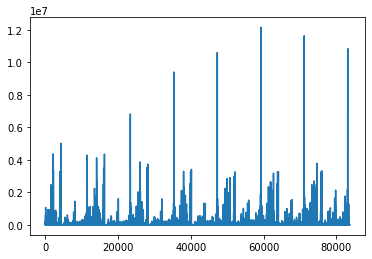

In [ ]:
#@title
df_clean["migrant_stock"].plot()

### Cleaned country names

In [ ]:
#@title
list1 = sorted(df_clean["destination"].unique())
list2 =  sorted(df_clean["origin"].unique())

countries = pd.DataFrame(
    {"destination": list1,
     "origin": list2
     })

countries


,destination,origin
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,American Samoa,American Samoa
4,Andorra,Andorra
...,...,...
226,Wallis and Futuna Islands,Wallis and Futuna Islands
227,Western Sahara,Western Sahara
228,Yemen,Yemen
229,Zambia,Zambia


### Final DataFrame

In [ ]:
#@title
df_clean

,destination,origin,year,migrant_stock
0,Burundi,Belgium,1990,642
1,Burundi,Democratic Republic of the Congo,1990,36654
2,Burundi,France,1990,321
3,Burundi,Kenya,1990,186
4,Burundi,Rwanda,1990,221943
...,...,...,...,...
83666,Wallis and Futuna Islands,France,2020,889
83667,Wallis and Futuna Islands,French Polynesia,2020,10
83668,Wallis and Futuna Islands,Mayotte,2020,27
83669,Wallis and Futuna Islands,New Caledonia,2020,1021


### Check for missing values

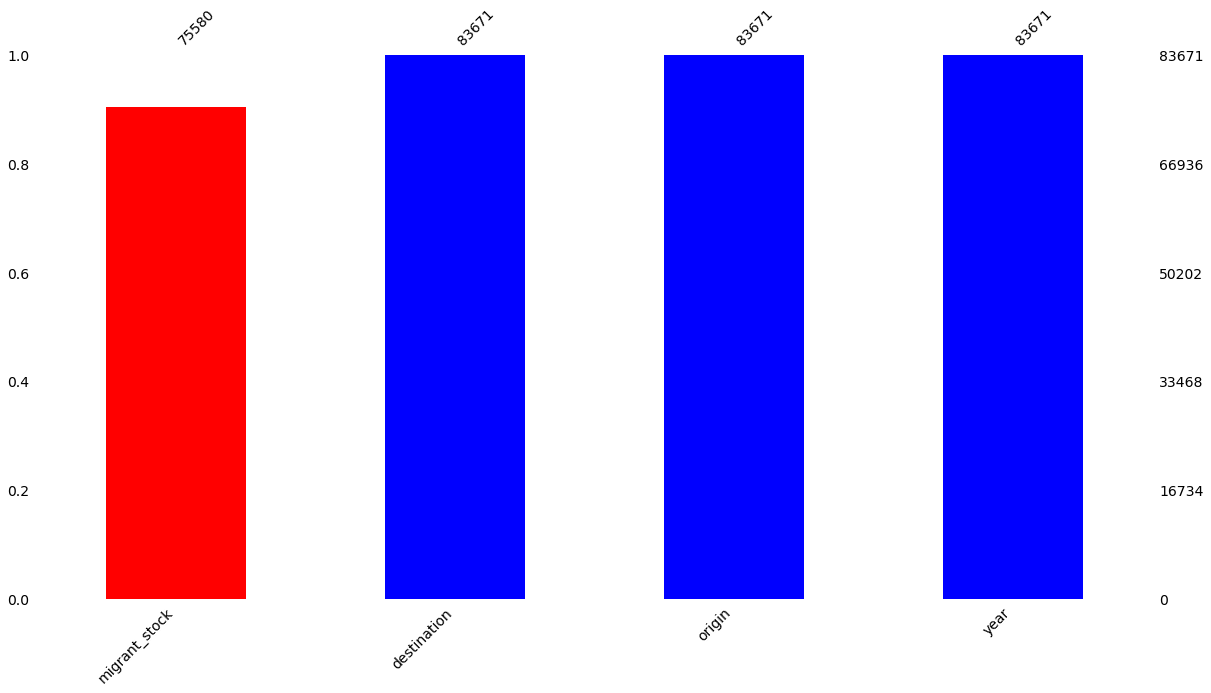

In [ ]:
#@title
m= msno.bar(df_clean, sort="ascending", figsize=(20,10), fontsize=14,
            color =["red", "blue","blue", "blue" ] )
plt.show()

### Remove missing values

In [ ]:
#@title

df_clean = df_clean[~df_clean['migrant_stock'].isnull()]
df_clean.shape

(75580, 4)

### Export to CSV file

In [ ]:
#@title
from google.colab import files

df_clean.to_csv("UN_dest_ori_migrant_stock_2020.csv", index = False, encoding = 'utf-8-sig')
#remove comment to download dataset 
#files.download("UN_dest_ori_migrant_stock_2020.csv")


#https://cyublog.com/articles/python-en/colab-pandas-three-ways-to-save-dataframe-data/ 

### Data cleaning and preprocessing World indicators dataset


In [ ]:
#@title
url2 = "https://github.com/angelhumano/viz_project/blob/main/wolrd_development_indicators_47.csv?raw=true"


In [ ]:
#@title
df1 = pd.read_csv(url2)

In [ ]:
#@title
df1

,Country Name,Year,Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG],Bribery incidence (% of firms experiencing at least one bribe payment request) [IC.FRM.BRIB.ZS],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],"Droughts, floods, extreme temperatures (% of population, average 1990-2009) [EN.CLC.MDAT.ZS]",CPIA property rights and rule-based governance rating (1=low to 6=high) [IQ.CPA.PROP.XQ],"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high) [IQ.CPA.TRAN.XQ]","Compulsory education, duration (years) [SE.COM.DURS]",...,Population growth (annual %) [SP.POP.GROW],"Population, total [SP.POP.TOTL]",Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],"Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]",Strength of legal rights index (0=weak to 12=strong) [IC.LGL.CRED.XQ],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],Trade (% of GDP) [NE.TRD.GNFS.ZS],"Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Unemployment, youth total (% of total labor force ages 15-24) (national estimate) [SL.UEM.1524.NE.ZS]"
0,Afghanistan,1990,..,..,..,0.191745115,..,..,..,..,...,4.47695438,12412311,..,6,6,..,11970,..,..,..
1,Afghanistan,1991,..,..,..,0.1676815788,..,..,..,..,...,6.900124486,13299016,..,6,6,..,12199.99981,..,..,..
2,Afghanistan,1992,..,..,..,0.09595774214,..,..,..,..,...,8.546107005,14485543,..,6,6,..,11420.00008,..,..,..
3,Afghanistan,1993,..,..,..,0.08472111043,..,..,..,..,...,8.790896707,15816601,..,6,6,..,11500,..,..,..
4,Afghanistan,1994,..,..,..,0.07554582739,..,..,..,..,...,7.659795534,17075728,..,6,6,..,11539.99996,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Zimbabwe,2017,1.972763753,..,0.3006134311,0.7262970709,..,2,2,7,...,1.459405813,14236599,30.4,7,6,5,28299.99924,50.02971226,..,..
6940,Zimbabwe,2018,-6.708681629,..,0.3353463132,0.8574112686,..,2,2.5,7,...,1.410381542,14438812,..,7,6,5,30829.99992,69.44702132,..,..
6941,Zimbabwe,2019,..,..,0.3334414884,0.8029785196,..,2,2.5,7,...,1.421141886,14645473,38.3,7,6,6,30530.00069,63.28191518,7.369999886,11.85999966
6942,Zimbabwe,2020,..,..,..,..,..,2,2.5,7,...,1.473871416,14862927,..,7,6,..,..,76.00193836,..,..


In [ ]:
#@title
# Replace ".." for np.nan
df1 = df1.replace("..", np.nan)

In [ ]:
#@title
df2 = df1.copy()
df2.shape

(6944, 49)

In [ ]:
#@title
# Remove brackets from column names
df2.columns = [re.sub("\[.*?\]","",col) for col in df2.columns]

#https://stackoverflow.com/a/72936077/15333580 
#https://stackoverflow.com/a/72936077/15333580

# Trim white spaces
df2.columns = df2.columns.str.strip()



### Sorted column names

In [ ]:
#@title
sorted(df2.columns)

['Adjusted net national income per capita (annual % growth)',
 'Bribery incidence (% of firms experiencing at least one bribe payment request)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (metric tons per capita)',
 'CPIA property rights and rule-based governance rating (1=low to 6=high)',
 'CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)',
 'Compulsory education, duration (years)',
 'Consumer price index (2010 = 100)',
 'Country Name',
 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'GDP per capita, PPP (current international $)',
 'Gini index',
 'Government expenditure on education, total (% of GDP)',
 'Government expenditure on education, total (% of government expenditure)',
 'Human capital index (HCI) (scale 0-1)',
 'Inflation, consumer prices (annual %)',
 'Intentional homicides (per 100,000 people)',
 '

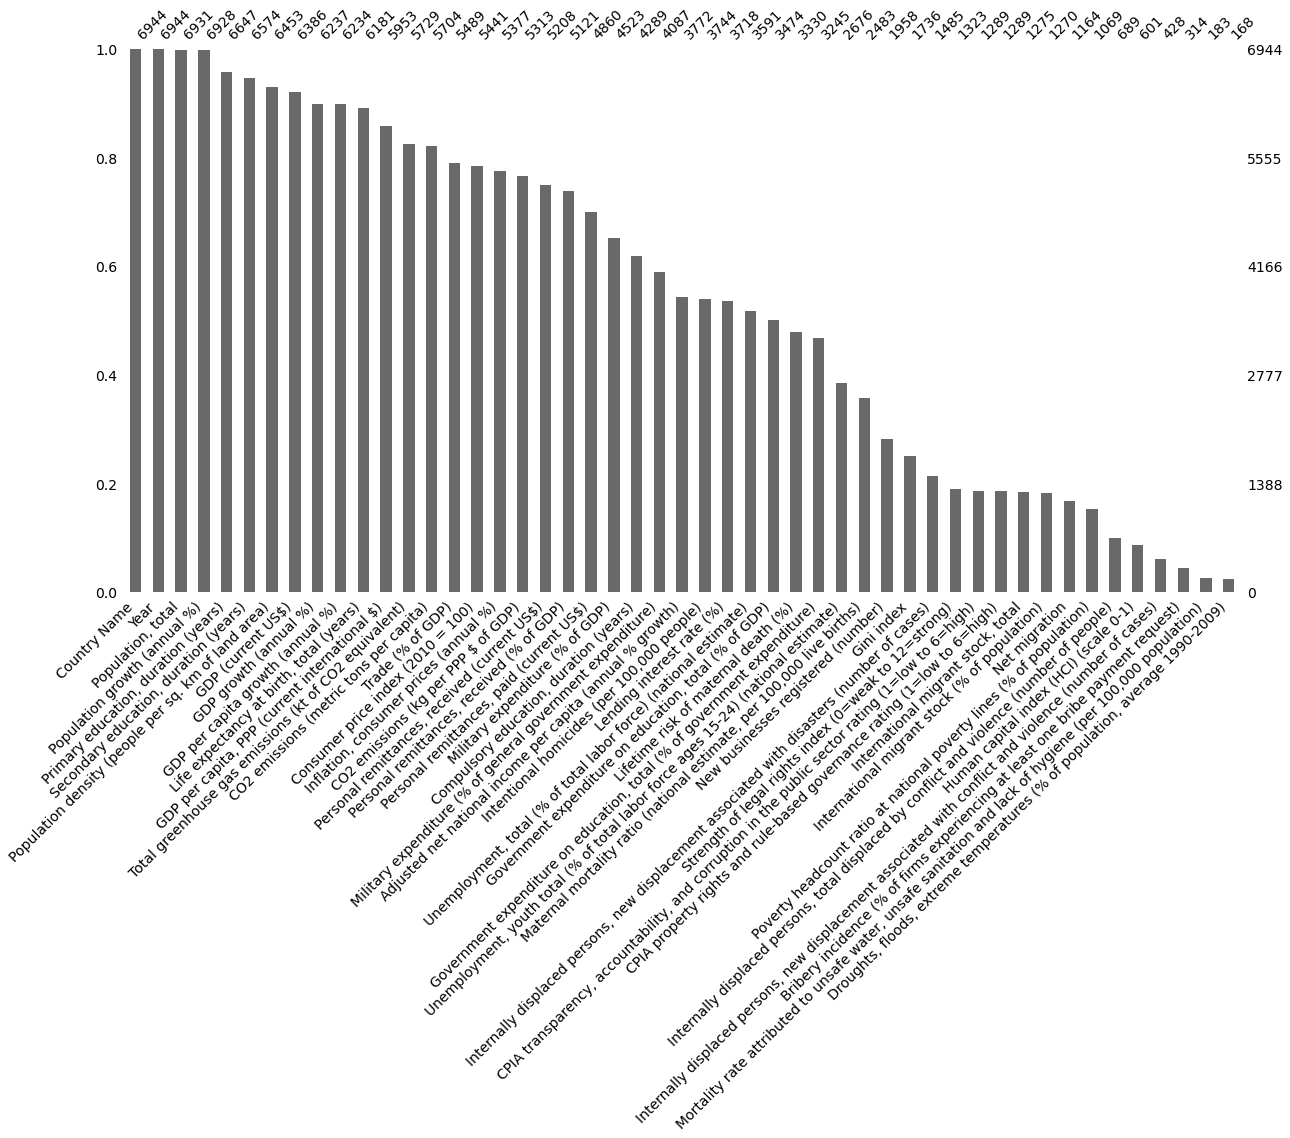

In [ ]:
#@title
m1= msno.bar(df2, sort="descending", figsize=(20,10), fontsize=14 )
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

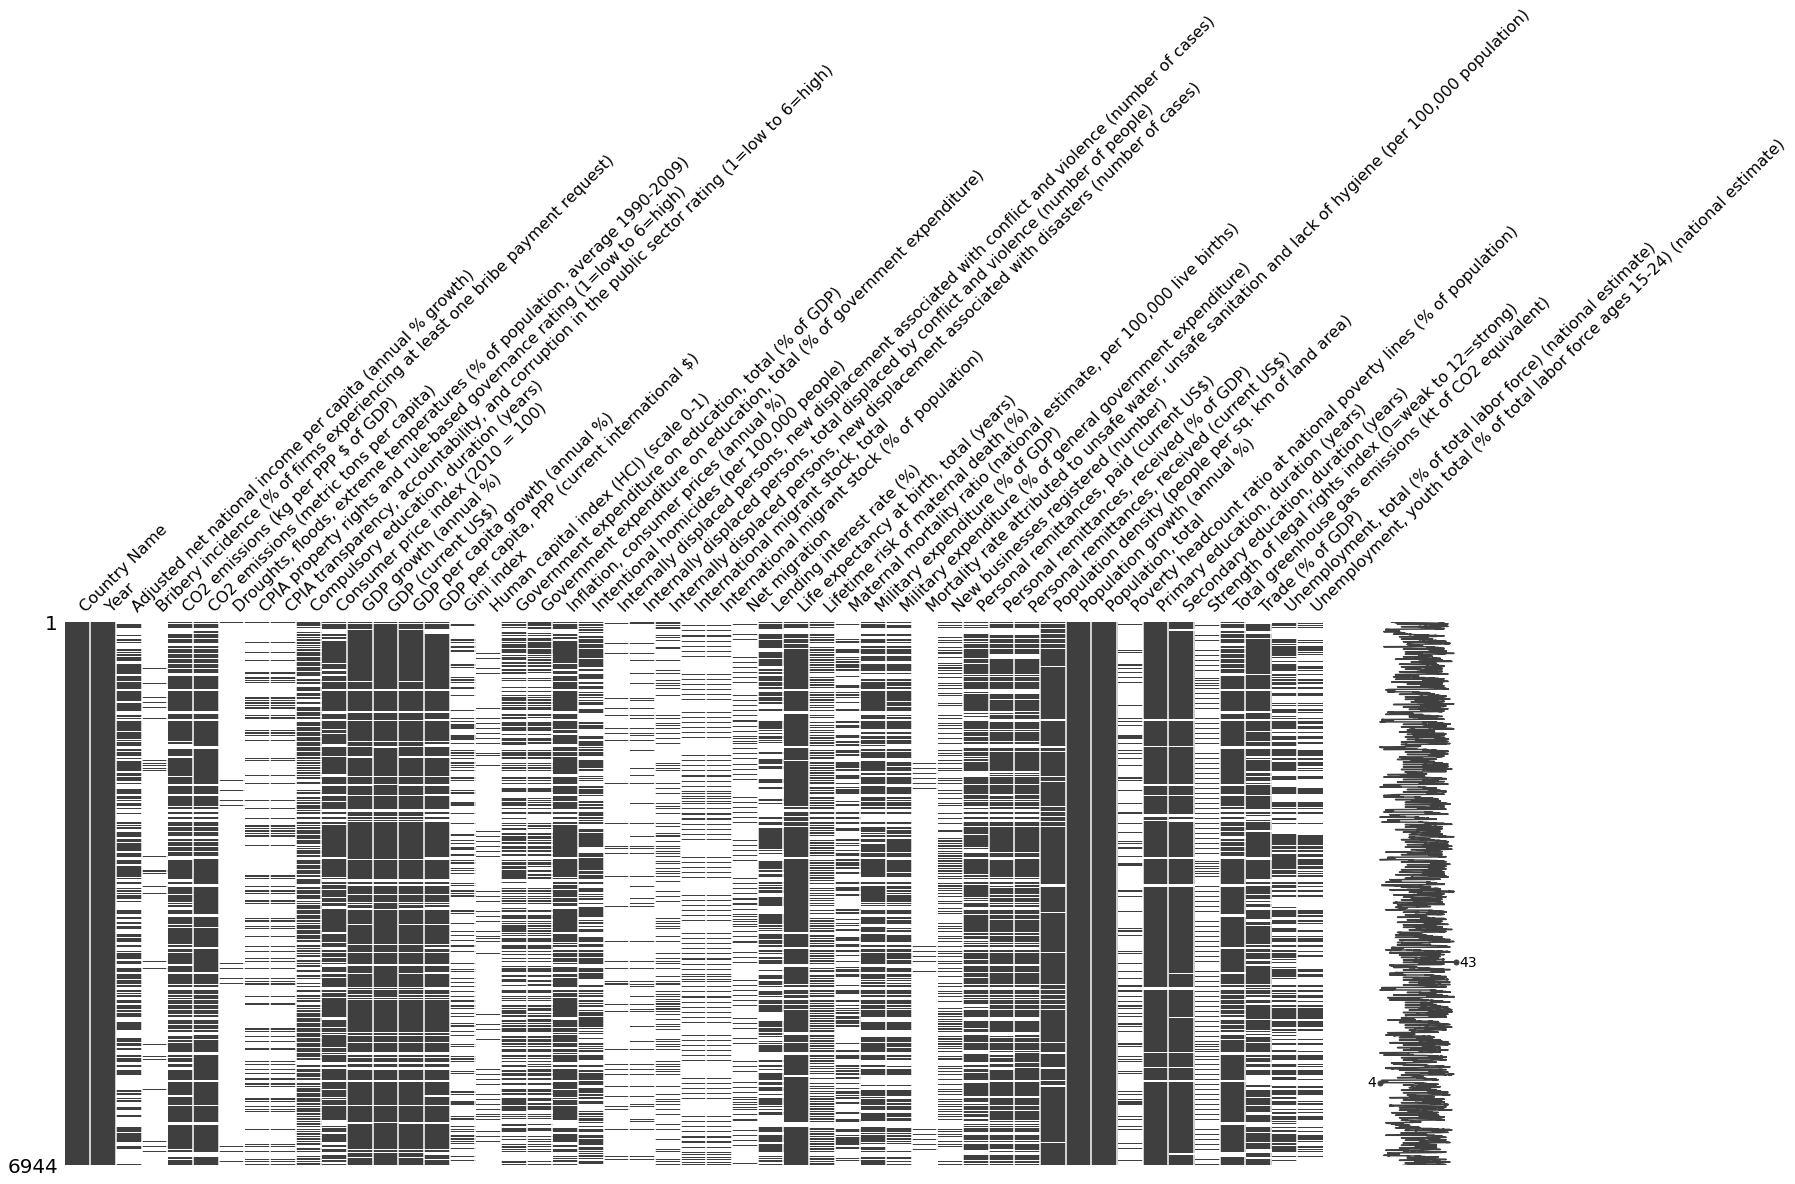

In [ ]:
#@title
msno.matrix(df2)
plt


### Export to CSV file

In [ ]:
#@title
from google.colab import files

df2.to_csv("world_development_indicators_data.csv", index = False, encoding = 'utf-8-sig') 
#remove comment to download dataset 
#files.download("world_development_indicators_data.csv")

### Destiantion total dataset

In [ ]:
#@title
df_destiantion_total = df_clean.groupby(["destination","year"], as_index=False).agg({"migrant_stock": np.sum})

# https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

In [ ]:
df_destiantion_total

,destination,year,migrant_stock
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174
...,...,...,...
1590,Zimbabwe,2000,361947
1591,Zimbabwe,2005,319910
1592,Zimbabwe,2010,286642
1593,Zimbabwe,2015,288208


In [ ]:
#@title
df_origin_total = df_clean.groupby(["origin","year"], as_index=False).agg({"migrant_stock": np.sum})

# https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html
#https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

In [ ]:
#@title
from google.colab import files

df_destiantion_total.to_csv("destination_total.csv", index = False, encoding = 'utf-8-sig') 
#remove comment to download dataset 
# files.download("destination_total.csv")


df_origin_total.to_csv("origin_total.csv", index = False, encoding = 'utf-8-sig') 
#remove comment to download dataset 
# files.download("origin_total.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Merge UN destination_total migrant stock with World development Indicators

In [ ]:
#@title

df_destiantion_total

,destination,year,migrant_stock
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174
...,...,...,...
1590,Zimbabwe,2000,361947
1591,Zimbabwe,2005,319910
1592,Zimbabwe,2010,286642
1593,Zimbabwe,2015,288208


In [ ]:
#@title
df_destiantion_total = df_destiantion_total.rename(columns={"destination": "Country Name", "year": "Year", "migrant_stock": "Destination migrant stock, total"})

In [ ]:
#@title
df_destiantion_total

,Country Name,Year,"Destination migrant stock, total"
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174
...,...,...,...
1590,Zimbabwe,2000,361947
1591,Zimbabwe,2005,319910
1592,Zimbabwe,2010,286642
1593,Zimbabwe,2015,288208


In [ ]:
#@title
f_origin_total = df_origin_total.rename(columns={"origin": "Country Name", "year": "Year", "migrant_stock": "Origin migrant stock, total"})

In [ ]:
#@title
df_origin_total

,Country Name,Year,"Origin migrant stock, total"
0,Afghanistan,1990,7679582
1,Afghanistan,1995,4347049
2,Afghanistan,2000,4750677
3,Afghanistan,2005,4116739
4,Afghanistan,2010,5269518
...,...,...,...
1612,Zimbabwe,2000,351985
1613,Zimbabwe,2005,500773
1614,Zimbabwe,2010,754643
1615,Zimbabwe,2015,1167064


In [ ]:
#@title
df_indicators = df2.copy()
df_indicators.head()

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,4.47695438,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,6.900124486,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,8.546107005,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,8.790896707,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN
4,Afghanistan,1994,NaN,NaN,NaN,0.07554582739,NaN,NaN,NaN,NaN,...,7.659795534,17075728,NaN,6,6,NaN,11539.99996,NaN,NaN,NaN


In [ ]:
#@title
df_indicators.shape

(6944, 49)

In [ ]:
df_destiantion_total.head()



,Country Name,Year,"Destination migrant stock, total"
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174


In [ ]:
#@title
df_destiantion_total.shape

(1595, 3)

In [ ]:
#@title
df_destiantion_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country Name                      1595 non-null   object
 1   Year                              1595 non-null   object
 2   Destination migrant stock, total  1595 non-null   Int64 
dtypes: Int64(1), object(2)
memory usage: 39.1+ KB


In [ ]:
#@title
df_indicators.dtypes.head(4)

Country Name                                                                      object
Year                                                                               int64
Adjusted net national income per capita (annual % growth)                         object
Bribery incidence (% of firms experiencing at least one bribe payment request)    object
dtype: object

In [ ]:
#@title
#change Year to object
df_indicators["Year"]= df_indicators["Year"].astype(str)


In [ ]:
#@title
df_indicators.dtypes.head(4)

Country Name                                                                      object
Year                                                                              object
Adjusted net national income per capita (annual % growth)                         object
Bribery incidence (% of firms experiencing at least one bribe payment request)    object
dtype: object

### Fixing issue with countries

In [ ]:
#@title
df_indicators.head(4)

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,4.47695438,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,6.900124486,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,8.546107005,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,8.790896707,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN


In [ ]:
#@title
df_indicators.dtypes.head(4)

Country Name                                                                      object
Year                                                                              object
Adjusted net national income per capita (annual % growth)                         object
Bribery incidence (% of firms experiencing at least one bribe payment request)    object
dtype: object

In [ ]:
df_destiantion_total.head(4)

,Country Name,Year,"Destination migrant stock, total"
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045


In [ ]:
#@title
df_destiantion_total.dtypes.head(4)

Country Name                        object
Year                                object
Destination migrant stock, total     Int64
dtype: object

In [ ]:
#@title
df_origin_total.dtypes.head(4)

Country Name                   object
Year                           object
Origin migrant stock, total     Int64
dtype: object

In [ ]:
#@title
countries = sorted(df_indicators["Country Name"].unique())

In [ ]:
#@title
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Fren

In [ ]:
countries2 = sorted(df_destiantion_total["Country Name"].unique())

In [ ]:
sorted(countries2)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador

In [ ]:
#@title
countries_ind_df = ['Afghanistan',
'Albania',
'Algeria',
'American Samoa',
'Andorra',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Aruba',
'Australia',
'Austria',
'Azerbaijan',
'Bahamas, The',
'Bahrain',
'Bangladesh',
'Barbados',
'Belarus',
'Belgium',
'Belize',
'Benin',
'Bermuda',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'British Virgin Islands',
'Brunei Darussalam',
'Bulgaria',
'Burkina Faso',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Canada',
'Cayman Islands',
'Central African Republic',
'Chad',
'Channel Islands',
'Chile',
'China',
'Colombia',
'Comoros',
'Congo, Dem. Rep.',
'Congo, Rep.',
'Costa Rica',
"Cote d'Ivoire",
'Croatia',
'Cuba',
'Curacao',
'Cyprus',
'Czechia',
'Denmark',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt, Arab Rep.',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Estonia',
'Eswatini',
'Ethiopia',
'Faroe Islands',
'Fiji',
'Finland',
'France',
'French Polynesia',
'Gabon',
'Gambia, The',
'Georgia',
'Germany',
'Ghana',
'Gibraltar',
'Greece',
'Greenland',
'Grenada',
'Guam',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Honduras',
'Hong Kong SAR, China',
'Hungary',
'Iceland',
'India',
'Indonesia',
'Iran, Islamic Rep.',
'Iraq',
'Ireland',
'Isle of Man',
'Israel',
'Italy',
'Jamaica',
'Japan',
'Jordan',
'Kazakhstan',
'Kenya',
'Kiribati',
"Korea, Dem. People's Rep.",
'Korea, Rep.',
'Kosovo',
'Kuwait',
'Kyrgyz Republic',
'Lao PDR',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Macao SAR, China',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Malta',
'Marshall Islands',
'Mauritania',
'Mauritius',
'Mexico',
'Micronesia, Fed. Sts.',
'Moldova',
'Monaco',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Myanmar',
'Namibia',
'Nauru',
'Nepal',
'Netherlands',
'New Caledonia',
'New Zealand',
'Nicaragua',
'Niger',
'Nigeria',
'North Macedonia',
'Northern Mariana Islands',
'Norway',
'Oman',
'Pakistan',
'Palau',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Poland',
'Portugal',
'Puerto Rico',
'Qatar',
'Romania',
'Russian Federation',
'Rwanda',
'Samoa',
'San Marino',
'Sao Tome and Principe',
'Saudi Arabia',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Singapore',
'Sint Maarten (Dutch part)',
'Slovak Republic',
'Slovenia',
'Solomon Islands',
'Somalia',
'South Africa',
'South Sudan',
'Spain',
'Sri Lanka',
'St. Kitts and Nevis',
'St. Lucia',
'St. Martin (French part)',
'St. Vincent and the Grenadines',
'Sudan',
'Suriname',
'Sweden',
'Switzerland',
'Syrian Arab Republic',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Tonga',
'Trinidad and Tobago',
'Tunisia',
'Turkiye',
'Turkmenistan',
'Turks and Caicos Islands',
'Tuvalu',
'Uganda',
'Ukraine',
'United Arab Emirates',
'United Kingdom',
'United States',
'Uruguay',
'Uzbekistan',
'Vanuatu',
'Venezuela, RB',
'Vietnam',
'Virgin Islands (U.S.)',
'West Bank and Gaza',
'Yemen, Rep.',
'Zambia',
'Zimbabwe']

In [ ]:

countries_dest_df = ["Afghanistan",
"Albania",
"Algeria",
"American Samoa",
"Andorra",
"Angola",
"Antigua and Barbuda",
"Argentina",
"Armenia",
"Aruba",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bermuda",
"Bhutan",
"Bolivia (Plurinational State of)",
"Bosnia and Herzegovina",
"Botswana",
"Brazil",
"British Virgin Islands",
"Brunei Darussalam",
"Bulgaria",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cambodia",
"Cameroon",
"Canada",
"Cayman Islands",
"Central African Republic",
"Chad",
"Channel Islands",
"Chile",
"China",
"Colombia",
"Comoros",
"Democratic Republic of the Congo",
"Congo",
"Costa Rica",
"Côte d'Ivoire",
"Croatia",
"Cuba",
"Curaçao",
"Cyprus",
"Czechia",
"Denmark",
"Djibouti",
"Dominica",
"Dominican Republic",
"Ecuador",
"Egypt",
"El Salvador",
"Equatorial Guinea",
"Eritrea",
"Estonia",
"Eswatini",
"Ethiopia",
"Faroe Islands",
"Fiji",
"Finland",
"France",
"French Polynesia",
"Gabon",
"Gambia",
"Georgia",
"Germany",
"Ghana",
"Gibraltar",
"Greece",
"Greenland",
"Grenada",
"Guam",
"Guatemala",
"Guinea",
"Guinea-Bissau",
"Guyana",
"Haiti",
"Honduras",
"China Hong Kong SAR",
"Hungary",
"Iceland",
"India",
"Indonesia",
"Iran (Islamic Republic of)",
"Iraq",
"Ireland",
"Isle of Man",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kiribati",
"Dem. People's Republic of Korea",
"Republic of Korea",
"Kosovo",
"Kuwait",
"Kyrgyzstan",
"Lao People's Democratic Republic",
"Latvia",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Liechtenstein",
"Lithuania",
"Luxembourg",
"China Macao SAR",
"Madagascar",
"Malawi",
"Malaysia",
"Falkland Islands (Malvinas)",
"Mali",
"Malta",
"Marshall Islands",
"Mauritania",
"Mauritius",
"Mexico",
"Micronesia (Fed. States of)",
"Republic of Moldova",
"Monaco",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
"Myanmar",
"Namibia",
"Nauru",
"Nepal",
"Netherlands",
"New Caledonia",
"New Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"North Macedonia",
"Northern Mariana Islands",
"Norway",
"Oman",
"Pakistan",
"Palau",
"Panama",
"Papua New Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Puerto Rico",
"Qatar",
"Romania",
"Russian Federation",
"Rwanda",
"Samoa",
"San Marino",
"Sao Tome and Principe",
"Saudi Arabia",
"Senegal",
"Serbia",
"Seychelles",
"Sierra Leone",
"Singapore",
"Sint Maarten (Dutch part)",
"Slovakia",
"Slovenia",
"Solomon Islands",
"Somalia",
"South Africa",
"South Sudan",
"Spain",
"Sri Lanka",
"Saint Kitts and Nevis",
"Saint Lucia",
"St. Martin (French part)",
"Saint Vincent and the Grenadines",
"Sudan",
"Suriname",
"Sweden",
"Switzerland",
"Syrian Arab Republic",
"Tajikistan",
"United Republic of Tanzania",
"Thailand",
"Timor-Leste",
"Togo",
"Tonga",
"Trinidad and Tobago",
"Tunisia",
"Turkey",
"Turkmenistan",
"Turks and Caicos Islands",
"Tuvalu",
"Uganda",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
"United States of America",
"Uruguay",
"Uzbekistan",
"Vanuatu",
"Venezuela (Bolivarian Republic of)",
"Viet Nam",
"United States Virgin Islands",
"State of Palestine",
"Yemen",
"Zambia",
"Zimbabwe"]

In [ ]:
len(countries_ind_df)



217

In [ ]:
len(countries_dest_df)

217

In [ ]:
old_values = countries_ind_df
new_values = countries_dest_df
country_dict = dictionary = dict(zip(old_values, new_values))

#https://stackoverflow.com/a/209854/15333580


In [ ]:

country_dict

{'Afghanistan': 'Afghanistan',
 'Albania': 'Albania',
 'Algeria': 'Algeria',
 'American Samoa': 'American Samoa',
 'Andorra': 'Andorra',
 'Angola': 'Angola',
 'Antigua and Barbuda': 'Antigua and Barbuda',
 'Argentina': 'Argentina',
 'Armenia': 'Armenia',
 'Aruba': 'Aruba',
 'Australia': 'Australia',
 'Austria': 'Austria',
 'Azerbaijan': 'Azerbaijan',
 'Bahamas, The': 'Bahamas',
 'Bahrain': 'Bahrain',
 'Bangladesh': 'Bangladesh',
 'Barbados': 'Barbados',
 'Belarus': 'Belarus',
 'Belgium': 'Belgium',
 'Belize': 'Belize',
 'Benin': 'Benin',
 'Bermuda': 'Bermuda',
 'Bhutan': 'Bhutan',
 'Bolivia': 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
 'Botswana': 'Botswana',
 'Brazil': 'Brazil',
 'British Virgin Islands': 'British Virgin Islands',
 'Brunei Darussalam': 'Brunei Darussalam',
 'Bulgaria': 'Bulgaria',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Cabo Verde': 'Cabo Verde',
 'Cambodia': 'Cambodia',
 'Cameroon': 'Cameroon',
 'Canada'

### Mapping countries

In [ ]:
test = df_indicators.copy()

In [ ]:
test["Country Name"].replace(country_dict, inplace=True)

# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

In [ ]:
test

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,4.47695438,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,6.900124486,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,8.546107005,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,8.790896707,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN
4,Afghanistan,1994,NaN,NaN,NaN,0.07554582739,NaN,NaN,NaN,NaN,...,7.659795534,17075728,NaN,6,6,NaN,11539.99996,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Zimbabwe,2017,1.972763753,NaN,0.3006134311,0.7262970709,NaN,2,2,7,...,1.459405813,14236599,30.4,7,6,5,28299.99924,50.02971226,NaN,NaN
6940,Zimbabwe,2018,-6.708681629,NaN,0.3353463132,0.8574112686,NaN,2,2.5,7,...,1.410381542,14438812,NaN,7,6,5,30829.99992,69.44702132,NaN,NaN
6941,Zimbabwe,2019,NaN,NaN,0.3334414884,0.8029785196,NaN,2,2.5,7,...,1.421141886,14645473,38.3,7,6,6,30530.00069,63.28191518,7.369999886,11.85999966
6942,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,2,2.5,7,...,1.473871416,14862927,NaN,7,6,NaN,NaN,76.00193836,NaN,NaN


In [ ]:
countries3 = sorted(test["Country Name"].unique())

In [ ]:
sorted(countries3)

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China Hong Kong SAR',
 'China Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritr

In [ ]:
len(countries3)

217

In [ ]:
 merged_data = pd.merge(test, df_destiantion_total,on=['Country Name','Year'],how='left')



 #https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html

In [ ]:
merged_data.shape

(6944, 50)

In [ ]:
merged_data.head()

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,"Population, total",Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Destination migrant stock, total"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745115,NaN,NaN,NaN,NaN,...,12412311,NaN,6,6,NaN,11970,NaN,NaN,NaN,50671
1,Afghanistan,1991,NaN,NaN,NaN,0.1676815788,NaN,NaN,NaN,NaN,...,13299016,NaN,6,6,NaN,12199.99981,NaN,NaN,NaN,<NA>
2,Afghanistan,1992,NaN,NaN,NaN,0.09595774214,NaN,NaN,NaN,NaN,...,14485543,NaN,6,6,NaN,11420.00008,NaN,NaN,NaN,<NA>
3,Afghanistan,1993,NaN,NaN,NaN,0.08472111043,NaN,NaN,NaN,NaN,...,15816601,NaN,6,6,NaN,11500,NaN,NaN,NaN,<NA>
4,Afghanistan,1994,NaN,NaN,NaN,0.07554582739,NaN,NaN,NaN,NaN,...,17075728,NaN,6,6,NaN,11539.99996,NaN,NaN,NaN,<NA>


In [ ]:
 merged_data2 = pd.merge(merged_data, df_origin_total,on=['Country Name','Year'],how='left')

In [ ]:
countries4 = sorted(merged_data["Country Name"].unique())
len(countries4)

217

In [ ]:
countries5 = sorted(merged_data2["Country Name"].unique())
len(countries5)

217

In [ ]:
from google.colab import files


merged_data2.to_csv("world_indicators_50.csv", index = False, encoding = 'utf-8-sig') 
#remove comment to download dataset 
#files.download("world_indicators_50.csv")

In [ ]:
# work on this

# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

In [ ]:



url3 = "https://github.com/angelhumano/viz_project/blob/main/world_indicators_50.csv?raw=true"
master_data = pd.read_csv(url3)

In [ ]:
master_data.head(4)

,Country Name,Year,Adjusted net national income per capita (annual % growth),Bribery incidence (% of firms experiencing at least one bribe payment request),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (metric tons per capita),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",CPIA property rights and rule-based governance rating (1=low to 6=high),"CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)","Compulsory education, duration (years)",...,Poverty headcount ratio at national poverty lines (% of population),"Primary education, duration (years)","Secondary education, duration (years)",Strength of legal rights index (0=weak to 12=strong),Total greenhouse gas emissions (kt of CO2 equivalent),Trade (% of GDP),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Destination migrant stock, total","Origin migrant stock, total"
0,Afghanistan,1990,NaN,NaN,NaN,0.191745,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,11970.00000,NaN,NaN,NaN,50671.0,7679582.0
1,Afghanistan,1991,NaN,NaN,NaN,0.167682,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,12199.99981,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,NaN,0.095958,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,11420.00008,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,NaN,0.084721,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,NaN,11500.00000,NaN,NaN,NaN,NaN,NaN


In [ ]:
sorted(master_data.columns)

['Adjusted net national income per capita (annual % growth)',
 'Bribery incidence (% of firms experiencing at least one bribe payment request)',
 'CO2 emissions (kg per PPP $ of GDP)',
 'CO2 emissions (metric tons per capita)',
 'CPIA property rights and rule-based governance rating (1=low to 6=high)',
 'CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)',
 'Compulsory education, duration (years)',
 'Consumer price index (2010 = 100)',
 'Country Name',
 'Destination migrant stock, total',
 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GDP per capita growth (annual %)',
 'GDP per capita, PPP (current international $)',
 'Gini index',
 'Government expenditure on education, total (% of GDP)',
 'Government expenditure on education, total (% of government expenditure)',
 'Human capital index (HCI) (scale 0-1)',
 'Inflation, consumer prices (annual %)',
 'Intentiona

In [ ]:
sorted(master_data["Country Name"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'China Hong Kong SAR',
 'China Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Dem. People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritr

### Reference
- International Migrant Stock: https://www.un.org/development/desa/pd/content/international-migrant-stock
- World Development Indicators: https://databank.worldbank.org/source/world-development-indicators

-----------------------------------------------------------

## Data Visualizations: Jason's Section

### Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# general adjustment to notebook
pd.options.mode.chained_assignment = None  # default='warn'

### Creating Master Dataframe for this portion

In [ ]:
dataset = pd.read_csv("https://github.com/xyjiang970/cis9655-data-visualization/blob/main/project/Datasets/world_indicators_50.csv?raw=true")
dataset.columns


Index(['Country Name', 'Year',
       'Adjusted net national income per capita (annual % growth)',
       'Bribery incidence (% of firms experiencing at least one bribe payment request)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'CO2 emissions (metric tons per capita)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'CPIA property rights and rule-based governance rating (1=low to 6=high)',
       'CPIA transparency, accountability, and corruption in the public sector rating (1=low to 6=high)',
       'Compulsory education, duration (years)',
       'Consumer price index (2010 = 100)', 'GDP growth (annual %)',
       'GDP (current US$)', 'GDP per capita growth (annual %)',
       'GDP per capita, PPP (current international $)', 'Gini index',
       'Human capital index (HCI) (scale 0-1)',
       'Government expenditure on education, total (% of GDP)',
       'Government expenditure on education, total (% of government expenditure

In [ ]:
# destination = coming in
# origin = leaving from

In [ ]:
# GDP PPP = GDP converted to US dollars using purchasing power parity rates 
# and divided by total population.
working_dataset = dataset[["Country Name", "Year",
                           "GDP per capita, PPP (current international $)",
                           "GDP per capita growth (annual %)", 
                           "Population growth (annual %)",
                           "Population density (people per sq. km of land area)",
                           "Destination migrant stock, total",
                           "Origin migrant stock, total"]]
                           
working_dataset.rename(columns = {"Country Name":"Country", 
                       "GDP per capita, PPP (current international $)":"Current GDP ($)",
                       "GDP per capita growth (annual %)":"Annual GDP Growth (%)",
                       "Population growth (annual %)":"Annual Population Growth (%)",
                       "Population density (people per sq. km of land area)":"Population Density",
                       "Destination migrant stock, total":"Destination Migrant Stock",
                       "Origin migrant stock, total":"Origin Migrant Stock"
                      }, 
            inplace = True)


# Filling
working_dataset.loc[:, ["Destination Migrant Stock", 
                        "Origin Migrant Stock"]] = working_dataset.loc[:, ["Destination Migrant Stock", 
                                                                           "Origin Migrant Stock"]].ffill()
working_dataset.loc[:, ["Population Density",]] = working_dataset.loc[:, ["Population Density"]].ffill()


display(working_dataset)
print(working_dataset.info())

,Country,Year,Current GDP ($),Annual GDP Growth (%),Annual Population Growth (%),Population Density,Destination Migrant Stock,Origin Migrant Stock
0,Afghanistan,1990,NaN,NaN,4.476954,19.030574,50671.0,7679582.0
1,Afghanistan,1991,NaN,NaN,6.900124,20.390071,50671.0,7679582.0
2,Afghanistan,1992,NaN,NaN,8.546107,22.209256,50671.0,7679582.0
3,Afghanistan,1993,NaN,NaN,8.790897,24.250036,50671.0,7679582.0
4,Afghanistan,1994,NaN,NaN,7.659796,26.180531,50671.0,7679582.0
...,...,...,...,...,...,...,...,...
6939,Zimbabwe,2017,2416.049969,3.192453,1.459406,36.801342,288208.0,1167064.0
6940,Zimbabwe,2018,2556.793484,3.356166,1.410382,37.324058,288208.0,1167064.0
6941,Zimbabwe,2019,2408.154197,-7.468627,1.421142,37.858273,288208.0,1167064.0
6942,Zimbabwe,2020,2251.455674,-7.620388,1.473871,38.420388,299407.0,1243314.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6944 entries, 0 to 6943
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       6944 non-null   object 
 1   Year                          6944 non-null   int64  
 2   Current GDP ($)               5953 non-null   float64
 3   Annual GDP Growth (%)         6234 non-null   float64
 4   Annual Population Growth (%)  6928 non-null   float64
 5   Population Density            6944 non-null   float64
 6   Destination Migrant Stock     6944 non-null   float64
 7   Origin Migrant Stock          6944 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 434.1+ KB
None


In [ ]:
# create and run a function to ceate data profiling dataframe

def create_data_profiling_df(data):
    
    # create an empty dataframe to gather information about each column
    data_profiling_df = pd.DataFrame(columns = ["column_name",
                                                "column_type",
                                                "unique_values",
                                                "duplicate_values",
                                                "null_values",
                                                "non_null_values"])

    # loop through each column to add rows to the data_profiling_df dataframe
    for column in data.columns:

        info_dict = {}

        try:
            info_dict["column_name"] = column
            info_dict["column_type"] = data[column].dtypes
            info_dict["unique_values"] = len(data[column].unique())
            info_dict["duplicate_values"] = data[column].count() - len(data[column].dropna().unique())
            info_dict["null_values"] = data[column].isna().sum()
            info_dict["non_null_values"] = data[column].count()
            info_dict["null_%"] = round(data[column].isna().sum() / len(data), 3)*100

        except:
            print(f"unable to read column: {column}, you may want to drop this column")

        data_profiling_df = data_profiling_df.append(info_dict, ignore_index=True)

    data_profiling_df=data_profiling_df[["column_name", "column_type", "null_values", "null_%", 
                                         "non_null_values", "unique_values", "duplicate_values"]]
                                         
    data_profiling_df.sort_values(by = ["null_values"],
                                  ascending = [False],
                                  inplace=True)
    
    return data_profiling_df

data_profiling_df = create_data_profiling_df(data=working_dataset)
data_profiling_df

,column_name,column_type,null_values,null_%,non_null_values,unique_values,duplicate_values
2,Current GDP ($),float64,991,14.3,5953,5954,0
3,Annual GDP Growth (%),float64,710,10.2,6234,6235,0
4,Annual Population Growth (%),float64,16,0.2,6928,6928,1
0,Country,object,0,0.0,6944,217,6727
1,Year,int64,0,0.0,6944,32,6912
5,Population Density,float64,0,0.0,6944,6448,496
6,Destination Migrant Stock,float64,0,0.0,6944,1473,5471
7,Origin Migrant Stock,float64,0,0.0,6944,1488,5456


### Visualization Prep I

In [ ]:
# Destination Migrant Stock
## Number of people coming into the country - listed country destination

# By largest
destination = working_dataset[["Country", "Year",
                              "Origin Migrant Stock",
                              "Destination Migrant Stock"]].set_index("Country")
destination = destination.groupby(["Year"])["Destination Migrant Stock"].nlargest(5).reset_index()

destination = pd.merge(destination, working_dataset,  on=['Country','Year'])
destination.rename(columns = {"Destination Migrant Stock_x":"Destination Migrant Stock"}, inplace=True)

destination = destination[["Year", "Country", "Destination Migrant Stock", "Origin Migrant Stock"]]

print("Destination Migrant Stock by Largest")
display(destination)
print("\n")
print("Destination Migrant Stock by Smallest")

# By smallest
destination_smallest = working_dataset[["Country", "Year",
                              "Origin Migrant Stock",
                              "Destination Migrant Stock"]].set_index("Country")
destination_smallest = destination_smallest.groupby(["Year"])["Destination Migrant Stock"].nsmallest(5).reset_index()

destination_smallest = pd.merge(destination_smallest, working_dataset,  on=['Country','Year'])
destination_smallest.rename(columns = {"Destination Migrant Stock_x":"Destination Migrant Stock"}, inplace=True)

destination_smallest = destination_smallest[["Year", "Country", "Destination Migrant Stock", "Origin Migrant Stock"]]

display(destination_smallest)

Destination Migrant Stock by Largest


,Year,Country,Destination Migrant Stock,Origin Migrant Stock
0,1990,United States of America,20134790.0,1726213.0
1,1990,Russian Federation,11516298.0,12653331.0
2,1990,India,7362652.0,6619431.0
3,1990,Ukraine,6481438.0,5545517.0
4,1990,Pakistan,6203799.0,3341086.0
...,...,...,...,...
155,2021,United States of America,46586605.0,2996223.0
156,2021,Germany,15628769.0,3855268.0
157,2021,Saudi Arabia,13001347.0,299268.0
158,2021,Russian Federation,11636152.0,10756697.0




Destination Migrant Stock by Smallest


,Year,Country,Destination Migrant Stock,Origin Migrant Stock
0,1990,Tuvalu,246.0,2350.0
1,1990,Tonga,820.0,32665.0
2,1990,Falkland Islands (Malvinas),824.0,255.0
3,1990,Marshall Islands,1022.0,1426.0
4,1990,Micronesia (Fed. States of),1242.0,7713.0
...,...,...,...,...
155,2021,Tuvalu,127.0,3670.0
156,2021,Micronesia (Fed. States of),964.0,24945.0
157,2021,Tonga,1043.0,74550.0
158,2021,Nauru,1286.0,2454.0


In [ ]:
# Origin Migrant Stock
## Number of people leaving the country - listed country as origin

# By largest
origin = working_dataset[["Country", "Year",
                          "Origin Migrant Stock",
                          "Destination Migrant Stock"]].set_index("Country")
origin = origin.groupby(["Year"])["Origin Migrant Stock"].nlargest(5).reset_index()

origin = pd.merge(origin, working_dataset,  on=['Country','Year'])
origin.rename(columns = {"Origin Migrant Stock_x":"Origin Migrant Stock"}, inplace=True)

origin = origin[["Year", "Country", "Origin Migrant Stock", "Destination Migrant Stock"]]

print("Largest Origin Migrant Stock Over the Years")
display(origin)
print("\n")
print("Smallest Origin Migrant Stock Over the Years")

# By smallest
origin_smallest = working_dataset[["Country", "Year",
                              "Origin Migrant Stock",
                              "Destination Migrant Stock"]].set_index("Country")
origin_smallest = origin_smallest.groupby(["Year"])["Origin Migrant Stock"].nsmallest(5).reset_index()

origin_smallest = pd.merge(origin_smallest, working_dataset,  on=['Country','Year'])
origin_smallest.rename(columns = {"Origin Migrant Stock_x":"Origin Migrant Stock"}, inplace=True)

origin_smallest = origin_smallest[["Year", "Country", "Origin Migrant Stock", "Destination Migrant Stock"]]

display(origin_smallest)

Largest Origin Migrant Stock Over the Years


,Year,Country,Origin Migrant Stock,Destination Migrant Stock
0,1990,Russian Federation,12653331.0,11516298.0
1,1990,Afghanistan,7679582.0,50671.0
2,1990,India,6619431.0,7362652.0
3,1990,Ukraine,5545517.0,6481438.0
4,1990,Bangladesh,5450443.0,741548.0
...,...,...,...,...
155,2021,India,17869492.0,4663386.0
156,2021,Mexico,11185737.0,1174411.0
157,2021,Russian Federation,10756697.0,11636152.0
158,2021,China,10461170.0,912307.0




Smallest Origin Migrant Stock Over the Years


,Year,Country,Origin Migrant Stock,Destination Migrant Stock
0,1990,Falkland Islands (Malvinas),255.0,824.0
1,1990,Cayman Islands,356.0,9244.0
2,1990,Sint Maarten (Dutch part),707.0,2237618.0
3,1990,Guam,1375.0,67120.0
4,1990,San Marino,1413.0,3203.0
...,...,...,...,...
155,2021,Falkland Islands (Malvinas),1518.0,1872.0
156,2021,American Samoa,1832.0,23027.0
157,2021,Cayman Islands,1908.0,29092.0
158,2021,French Polynesia,2157.0,27809.0


In [ ]:
origin2 = dataset[["Country Name", "Year",
                   "Destination migrant stock, total",
                   "Origin migrant stock, total"]]

origin2.rename(columns = {"Country Name":"Country",
                          "Destination migrant stock, total":"Destination Migrant Stock",
                          "Origin migrant stock, total":"Origin Migrant Stock"
                                }, 
                    inplace = True)

origin2.dropna(inplace=True)

origin2 = origin2[["Country", "Year",
                              "Origin Migrant Stock",
                              "Destination Migrant Stock"]].set_index("Country")
origin2 = origin2.groupby(["Year"])["Origin Migrant Stock"].nlargest(5).reset_index()
origin2 = origin2.set_index(["Year", "Country"])

origin2 = origin2.reset_index(level=['Year','Country'])

#origin2 

In [ ]:
# fig = px.bar(origin2, x="Year", y="Origin Migrant Stock", 
#              title='TBD', 
#              color="Country",
#              width=960,
#              height=960,
#              text="Origin Migrant Stock",
#              text_auto='.2s')

# fig.show()

In [ ]:
# PPP GROWTH
## PPP GDP is gross domestic product converted to international dollars using purchasing 
## power parity rates. An international dollar has the same purchasing power over GDP as the 
## U.S. dollar has in the United States.

# By largest
GDP_growth = working_dataset[["Country", "Year", "Annual GDP Growth (%)",
                              "Destination Migrant Stock",
                              "Origin Migrant Stock"]].set_index("Country")
GDP_growth = GDP_growth.groupby(["Year"])["Annual GDP Growth (%)"].nlargest(1).reset_index()

GDP_growth = pd.merge(GDP_growth, working_dataset,  on=['Country','Year'])
GDP_growth.rename(columns = {"Annual GDP Growth (%)_x":"Annual GDP Growth (%)"}, inplace=True)

GDP_growth = GDP_growth[["Year", "Country", "Annual GDP Growth (%)", "Destination Migrant Stock",
                         "Origin Migrant Stock"]]

print("GDP Growth by Largest")
display(GDP_growth.head(10))
print("\n")
print("GDP Growth by Smallest")


# By smallest
GDP_growth_smallest = working_dataset[["Country", "Year", "Annual GDP Growth (%)",
                              "Destination Migrant Stock",
                              "Origin Migrant Stock"]].set_index("Country")
GDP_growth_smallest = GDP_growth_smallest.groupby(["Year"])["Annual GDP Growth (%)"].nsmallest(1).reset_index()

GDP_growth_smallest = pd.merge(GDP_growth_smallest, working_dataset,  on=['Country','Year'])
GDP_growth_smallest.rename(columns = {"Annual GDP Growth (%)_x":"Annual GDP Growth (%)"}, inplace=True)

GDP_growth_smallest = GDP_growth_smallest[["Year", "Country", "Annual GDP Growth (%)", "Destination Migrant Stock",
                         "Origin Migrant Stock"]]

display(GDP_growth_smallest.head(10))

GDP Growth by Largest


,Year,Country,Annual GDP Growth (%),Destination Migrant Stock,Origin Migrant Stock
0,1990,Iraq,53.974823,63698.0,642933.0
1,1991,Lebanon,43.377413,520116.0,507722.0
2,1992,Equatorial Guinea,30.399610,2214.0,36175.0
3,1993,Iraq,26.493213,63698.0,642933.0
4,1994,Eritrea,22.324921,10766.0,170603.0
5,1995,Rwanda,37.535461,201277.0,2060363.0
6,1996,Bosnia and Herzegovina,92.201815,68250.0,1372526.0
7,1997,Equatorial Guinea,140.367024,2934.0,46412.0
8,1998,Iraq,30.742344,175951.0,752604.0
9,1999,Equatorial Guinea,20.637800,2934.0,46412.0




GDP Growth by Smallest


,Year,Country,Annual GDP Growth (%),Destination Migrant Stock,Origin Migrant Stock
0,1990,Georgia,-14.765157,289184.0,919438.0
1,1991,Iraq,-64.992369,63698.0,642933.0
2,1992,Georgia,-45.325107,289184.0,919438.0
3,1993,Georgia,-29.841290,289184.0,919438.0
4,1994,Rwanda,-47.503237,139805.0,547717.0
5,1995,Tajikistan,-13.717390,347871.0,555426.0
6,1996,Tajikistan,-17.932098,347871.0,555426.0
7,1997,Bulgaria,-13.590923,30380.0,649430.0
8,1998,Guinea-Bissau,-29.461965,26883.0,67149.0
9,1999,Gabon,-11.134919,166930.0,16610.0


In [ ]:
# PPP CURRENT
## PPP GDP is gross domestic product converted to international dollars using purchasing 
## power parity rates. An international dollar has the same purchasing power over GDP as the 
## U.S. dollar has in the United States.

# By largest
GDP_current = working_dataset[["Country", "Year", "Current GDP ($)", 
                               "Destination Migrant Stock",
                               "Origin Migrant Stock"]].set_index("Country")
GDP_current = GDP_current.groupby(["Year"])["Current GDP ($)"].nlargest(5).reset_index()

GDP_current = pd.merge(GDP_current, working_dataset,  on=['Country','Year'])
GDP_current.rename(columns = {"Current GDP ($)_x":"Current GDP ($)"}, inplace=True)

GDP_current = GDP_current[["Year", "Country", "Current GDP ($)", "Destination Migrant Stock",
                           "Origin Migrant Stock"]]

print("GDP Current By Largest")
display(GDP_current)
print("\n")
print("GDP Current By Smallest")

# By smallest
GDP_current_smallest = working_dataset[["Country", "Year", "Current GDP ($)", 
                               "Destination Migrant Stock",
                               "Origin Migrant Stock"]].set_index("Country")
GDP_current_smallest = GDP_current_smallest.groupby(["Year"])["Current GDP ($)"].nsmallest(5).reset_index()

GDP_current_smallest = pd.merge(GDP_current_smallest, working_dataset,  on=['Country','Year'])
GDP_current_smallest.rename(columns = {"Current GDP ($)_x":"Current GDP ($)"}, inplace=True)

GDP_current_smallest = GDP_current_smallest[["Year", "Country", "Current GDP ($)", "Destination Migrant Stock",
                           "Origin Migrant Stock"]]

display(GDP_current_smallest)

GDP Current By Largest


,Year,Country,Current GDP ($),Destination Migrant Stock,Origin Migrant Stock
0,1990,United Arab Emirates,87131.67980,1287556.0,79499.0
1,1990,Brunei Darussalam,55853.60521,72400.0,26323.0
2,1990,Bermuda,34870.74775,15030.0,71681.0
3,1990,Saudi Arabia,32052.37305,4830679.0,107045.0
4,1990,Luxembourg,29933.35012,113439.0,36108.0
...,...,...,...,...,...
155,2021,Luxembourg,134753.79770,294385.0,81757.0
156,2021,Singapore,116486.47320,2237618.0,348464.0
157,2021,Ireland,106455.75300,871256.0,734317.0
158,2021,Qatar,93521.44180,2192930.0,25705.0




GDP Current By Smallest


,Year,Country,Current GDP ($),Destination Migrant Stock,Origin Migrant Stock
0,1990,Mozambique,291.170309,113741.0,2222354.0
1,1990,Myanmar,400.088369,120047.0,685308.0
2,1990,Ethiopia,414.566679,1125957.0,1689941.0
3,1990,Rwanda,554.987705,139805.0,547717.0
4,1990,Burkina Faso,589.302882,326879.0,1021331.0
...,...,...,...,...,...
155,2021,Burundi,793.236434,312830.0,551105.0
156,2021,Central African Republic,1020.533165,63665.0,816668.0
157,2021,Democratic Republic of the Congo,1218.768128,919308.0,1832069.0
158,2021,Somalia,1302.452519,35085.0,2034221.0


In [ ]:
# Annual Population Growth

# By largest
annual_PG = working_dataset[["Country", "Year", "Annual Population Growth (%)", 
                               "Destination Migrant Stock",
                               "Origin Migrant Stock"]].set_index("Country")
annual_PG = annual_PG.groupby(["Year"])["Annual Population Growth (%)"].nlargest(5).reset_index()

annual_PG = pd.merge(annual_PG, working_dataset,  on=['Country','Year'])
annual_PG.rename(columns = {"Annual Population Growth (%)_x":"Annual Population Growth (%)"}, inplace=True)

annual_PG = annual_PG[["Year", "Country", "Annual Population Growth (%)", "Destination Migrant Stock",
                       "Origin Migrant Stock"]]


print("Annual Population Growth by Largest")
display(annual_PG)
print("\n")
print("Annual Population Growth by Smallest")

# By smallest
annual_PG_smallest = working_dataset[["Country", "Year", "Annual Population Growth (%)", 
                               "Destination Migrant Stock",
                               "Origin Migrant Stock"]].set_index("Country")
annual_PG_smallest = annual_PG_smallest.groupby(["Year"])["Annual Population Growth (%)"].nsmallest(5).reset_index()

annual_PG_smallest = pd.merge(annual_PG_smallest, working_dataset,  on=['Country','Year'])
annual_PG_smallest.rename(columns = {"Annual Population Growth (%)_x":"Annual Population Growth (%)"}, inplace=True)

annual_PG_smallest = annual_PG_smallest[["Year", "Country", "Annual Population Growth (%)", "Destination Migrant Stock",
                       "Origin Migrant Stock"]]

display(annual_PG_smallest)

Annual Population Growth by Largest


,Year,Country,Annual Population Growth (%),Destination Migrant Stock,Origin Migrant Stock
0,1990,St. Martin (French part),9.298752,7716.0,71227.0
1,1990,United Arab Emirates,5.784265,1287556.0,79499.0
2,1990,Sint Maarten (Dutch part),5.470755,2237618.0,707.0
3,1990,Cayman Islands,5.186122,9244.0,356.0
4,1990,Northern Mariana Islands,4.950952,25498.0,2517.0
...,...,...,...,...,...
155,2021,Syrian Arab Republic,4.333410,801791.0,8457214.0
156,2021,Niger,3.746777,333463.0,399707.0
157,2021,Equatorial Guinea,3.288627,10506.0,128774.0
158,2021,Angola,3.195916,154537.0,668066.0




Annual Population Growth by Smallest


,Year,Country,Annual Population Growth (%),Destination Migrant Stock,Origin Migrant Stock
0,1990,Bulgaria,-1.803750,19077.0,612960.0
1,1990,Liberia,-1.459111,74599.0,516878.0
2,1990,Curaçao,-1.051536,2806.0,2104.0
3,1990,Hungary,-1.033117,336699.0,391583.0
4,1990,Bosnia and Herzegovina,-0.989771,54542.0,861760.0
...,...,...,...,...,...
155,2021,Singapore,-4.170336,2237618.0,348464.0
156,2021,Croatia,-3.742377,523138.0,1039526.0
157,2021,Republic of Moldova,-1.793009,99409.0,1159443.0
158,2021,Curaçao,-1.677791,56531.0,7611.0


In [ ]:
# Population Density


# By largest
population_density = working_dataset[["Country", "Year", "Population Density", 
                               "Destination Migrant Stock",
                               "Origin Migrant Stock"]].set_index("Country")
population_density = population_density.groupby(["Year"])["Population Density"].nlargest(5).reset_index()

population_density = pd.merge(population_density, working_dataset,  on=['Country','Year'])
population_density.rename(columns = {"Population Density_x":"Population Density"}, inplace=True)

population_density = population_density[["Year", "Country", 
                                         "Population Density", 
                                         "Destination Migrant Stock", 
                                         "Origin Migrant Stock"]]

print("Population Density by Largest")
display(population_density)
print("\n")
print("Population Density by Smallest")


# By smallest
population_density_smallest = working_dataset[["Country", "Year", "Population Density", 
                               "Destination Migrant Stock",
                               "Origin Migrant Stock"]].set_index("Country")
population_density_smallest = population_density_smallest.groupby(["Year"])["Population Density"].nsmallest(5).reset_index()

population_density_smallest = pd.merge(population_density_smallest, working_dataset,  on=['Country','Year'])
population_density_smallest.rename(columns = {"Population Density_x":"Population Density"}, inplace=True)

population_density_smallest = population_density_smallest[["Year", "Country", 
                                         "Population Density", 
                                         "Destination Migrant Stock", 
                                         "Origin Migrant Stock"]]

display(population_density_smallest)

Population Density by Largest


,Year,Country,Population Density,Destination Migrant Stock,Origin Migrant Stock
0,1990,China Macao SAR,17190.800000,294385.0,81757.0
1,1990,Monaco,14520.473610,11565.0,4475.0
2,1990,Sint Maarten (Dutch part),7918.951253,2237618.0,707.0
3,1990,China Hong Kong SAR,5762.121212,38944.0,985077.0
4,1990,Singapore,4547.958209,445694.0,156444.0
...,...,...,...,...,...
155,2021,China Macao SAR,19736.838910,294385.0,81757.0
156,2021,Monaco,19360.631480,13768.0,32552.0
157,2021,Singapore,7918.951253,2237618.0,348464.0
158,2021,China Hong Kong SAR,7124.761905,38944.0,985077.0




Population Density by Smallest


,Year,Country,Population Density,Destination Migrant Stock,Origin Migrant Stock
0,1990,Greenland,0.162716,9222.0,9504.0
1,1990,Mongolia,1.411454,6043.0,24466.0
2,1990,Namibia,1.740455,117404.0,16077.0
3,1990,Mauritania,1.973753,110227.0,134478.0
4,1990,Montenegro,2.104833,20616.0,77384.0
...,...,...,...,...,...
155,2021,Greenland,0.137330,5618.0,17866.0
156,2021,Mongolia,2.104833,20616.0,82098.0
157,2021,Namibia,3.086295,107119.0,47770.0
158,2021,Australia,3.340250,7586588.0,598765.0


### Visualization Prep II

In [ ]:
destination2 = dataset[["Country Name", "Year",
                        "Destination migrant stock, total",
                        "Origin migrant stock, total"]]

destination2.rename(columns = {"Country Name":"Country",
                               "Destination migrant stock, total":"Destination Migrant Stock",
                               "Origin migrant stock, total":"Origin Migrant Stock"
                                }, 
                    inplace = True)

destination2.dropna(inplace=True)

destination2 = destination2[["Country", "Year",
                              "Origin Migrant Stock",
                              "Destination Migrant Stock"]].set_index("Country")
destination2 = destination2.groupby(["Year"])["Destination Migrant Stock"].nlargest(5).reset_index()
destination2 = destination2.set_index(["Year", "Country"])

destination2 = destination2.reset_index(level=['Year','Country'])

destination2

,Year,Country,Destination Migrant Stock
0,1990,United States of America,20134790.0
1,1990,Russian Federation,11516298.0
2,1990,India,7362652.0
3,1990,Ukraine,6481438.0
4,1990,Pakistan,6203799.0
5,1995,United States of America,26593925.0
6,1995,Russian Federation,11920139.0
7,1995,Germany,7417354.0
8,1995,India,6916939.0
9,1995,France,6087993.0


In [ ]:
select_countries = working_dataset[(working_dataset["Year"].isin([1990,
                                                            1995,
                                                            2000,
                                                            2005,
                                                            2010,
                                                            2015,
                                                            2020])) & ((working_dataset["Country"].isin(["Mexico",
                                                                                                        "Philippines",
                                                                                                        "India",
                                                                                                        "China",
                                                                                                        "United States of America"])))]

select_countries = select_countries.reset_index(drop=True)
select_countries = select_countries.replace(['United States of America'],'USA')
select_countries.set_index("Country", inplace=True)

select_countries

,Year,Current GDP ($),Annual GDP Growth (%),Annual Population Growth (%),Population Density,Destination Migrant Stock,Origin Migrant Stock
Country,,,,,,,
China,1990,981.419207,2.406559,1.467303,120.448249,356664.0,4231625.0
China,1995,1860.525063,9.754955,1.086509,127.839872,406844.0,5030321.0
China,2000,2917.242530,7.638598,0.787957,133.971904,456065.0,5884919.0
China,2005,5056.404724,10.741375,0.588125,138.330136,603808.0,7337211.0
China,2010,9254.779603,10.102833,0.482960,141.936072,754946.0,8714648.0
China,2015,12897.502290,6.420736,0.581456,146.408883,860968.0,10240817.0
China,2020,17189.281790,1.996619,0.238041,149.723553,912307.0,10461170.0
India,1990,1200.345535,3.365073,2.076089,293.717455,7362652.0,6619431.0
India,1995,1572.602918,5.529881,1.918941,324.204839,6916939.0,7153439.0


----------------------------------------------------

In [ ]:
# Loading dataset
url = "https://github.com/xyjiang970/cis9655-data-visualization/blob/main/project/Datasets/UN_dest_ori_migrant_stock_2020.csv?raw=true"

df = pd.read_csv(url)

In [ ]:
# Alphabetize by destination, then order by year, lastly alphabetize by origin

#df_grouped = df.groupby(["destination","year"], as_index=False).agg(lambda x: set(x))
df_grouped = df.groupby(["destination","year","origin"], as_index=False).sum("migrant_stock")

df_grouped.head(20)

,destination,year,origin,migrant_stock
0,Afghanistan,1990,Pakistan,8107
1,Afghanistan,1990,Tajikistan,40537
2,Afghanistan,1990,Uzbekistan,2027
3,Afghanistan,1995,Pakistan,17225
4,Afghanistan,1995,Tajikistan,36733
5,Afghanistan,1995,Uzbekistan,1836
6,Afghanistan,2000,Pakistan,26343
7,Afghanistan,2000,Tajikistan,32929
8,Afghanistan,2000,Uzbekistan,1646
9,Afghanistan,2005,Pakistan,37163


In [ ]:
# Dataframe of only migrant stocks for U.S.

df_grouped_us = df_grouped[(df_grouped.destination.isin(["United States of America"]))]

df_grouped_us

,destination,year,origin,migrant_stock
72943,United States of America,1990,Afghanistan,28444
72944,United States of America,1990,Albania,5627
72945,United States of America,1990,Algeria,4629
72946,United States of America,1990,Angola,2252
72947,United States of America,1990,Antigua and Barbuda,12022
...,...,...,...,...
73988,United States of America,2020,Venezuela (Bolivarian Republic of),505647
73989,United States of America,2020,Viet Nam,1403193
73990,United States of America,2020,Yemen,56816
73991,United States of America,2020,Zambia,36122


In [ ]:
# Reordering and resetting index - showing country of origin by most migrants by year

us_migrants = df_grouped_us.groupby(["destination","year","origin"], as_index=False).sum("migrant_stock")
us_migrants = us_migrants.sort_values(["year","migrant_stock"], ascending=[True, False]).reset_index(drop=True)
us_migrants.head(151)


,destination,year,origin,migrant_stock
0,United States of America,1990,Mexico,4298014
1,United States of America,1990,Puerto Rico,1180383
2,United States of America,1990,Philippines,912674
3,United States of America,1990,China,773939
4,United States of America,1990,Canada,744830
...,...,...,...,...
146,United States of America,1990,Côte d'Ivoire,1388
147,United States of America,1990,Marshall Islands,1086
148,United States of America,1990,Guinea,1032
149,United States of America,1990,Turkmenistan,569


In [ ]:
# Since we're just dealing with the U.S here - resetting the index

us_migrants.set_index("origin", inplace=True)
us_migrants

,destination,year,migrant_stock
origin,,,
Mexico,United States of America,1990,4298014
Puerto Rico,United States of America,1990,1180383
Philippines,United States of America,1990,912674
China,United States of America,1990,773939
Canada,United States of America,1990,744830
...,...,...,...
Kyrgyzstan,United States of America,2020,8890
Iceland,United States of America,2020,8241
Tajikistan,United States of America,2020,6979


In [ ]:
# Select just the top 5 highest migrant_stock by origin by year
# into the U.S

#us_migrants=us_migrants.groupby(["year"]).migrant_stock.nlargest(5).reset_index()
us_migrants=us_migrants.groupby(["year"])["migrant_stock"].nlargest(5).reset_index()
us_migrants.drop(us_migrants[(us_migrants['origin'] == "Puerto Rico")].index, inplace=True)

us_migrants

,year,origin,migrant_stock
0,1990,Mexico,4298014
2,1990,Philippines,912674
3,1990,China,773939
4,1990,Canada,744830
5,1995,Mexico,6827945
7,1995,Philippines,1156143
8,1995,China,1058487
9,1995,Cuba,815617
10,2000,Mexico,9410529
12,2000,Philippines,1403834


In [ ]:
us_migrants.set_index(["year","origin"], inplace=True)
us_migrants

migrant_stock
year origin                    
1990 Mexico             4298014
     Philippines         912674
     China               773939
     Canada              744830
1995 Mexico             6827945
     Philippines        1156143
     China              1058487
     Cuba                815617
2000 Mexico             9410529
     Philippines        1403834
     China              1348465
     India              1048517
2005 Mexico            10611064
     China              1607654
     Philippines        1596459
     India              1390605
2010 Mexico            12168662
     China              1922950
     Philippines        1843117
     India              1784284
2015 Mexico            11643298
     China              2676697
     India              2389639
     Philippines        1982369
2020 Mexico            10853105
     India              2723764
     China              2184110
     Philippines        2061178

### Data Visualizations

In [ ]:
#@title
fig = px.bar(destination2, x="Year", y="Destination Migrant Stock", 
             title='Popular Destination Countries Over the Years <br><sup>By: Jason Jiang</sup>', 
             color="Country",
             width=1200,
             height=800,
             text="Destination Migrant Stock",
             text_auto='.2s')

# fig.update_layout(
#     barmode='stack',
#     yaxis={'categoryoder':'category ascending'}
# )

# add annotation
fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0,
                                        y=-0.13,
                                        showarrow=False,
                                        text="Summary: stacked bar chart showing of popular countries migrants travel to from 1990 to 2020.",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()

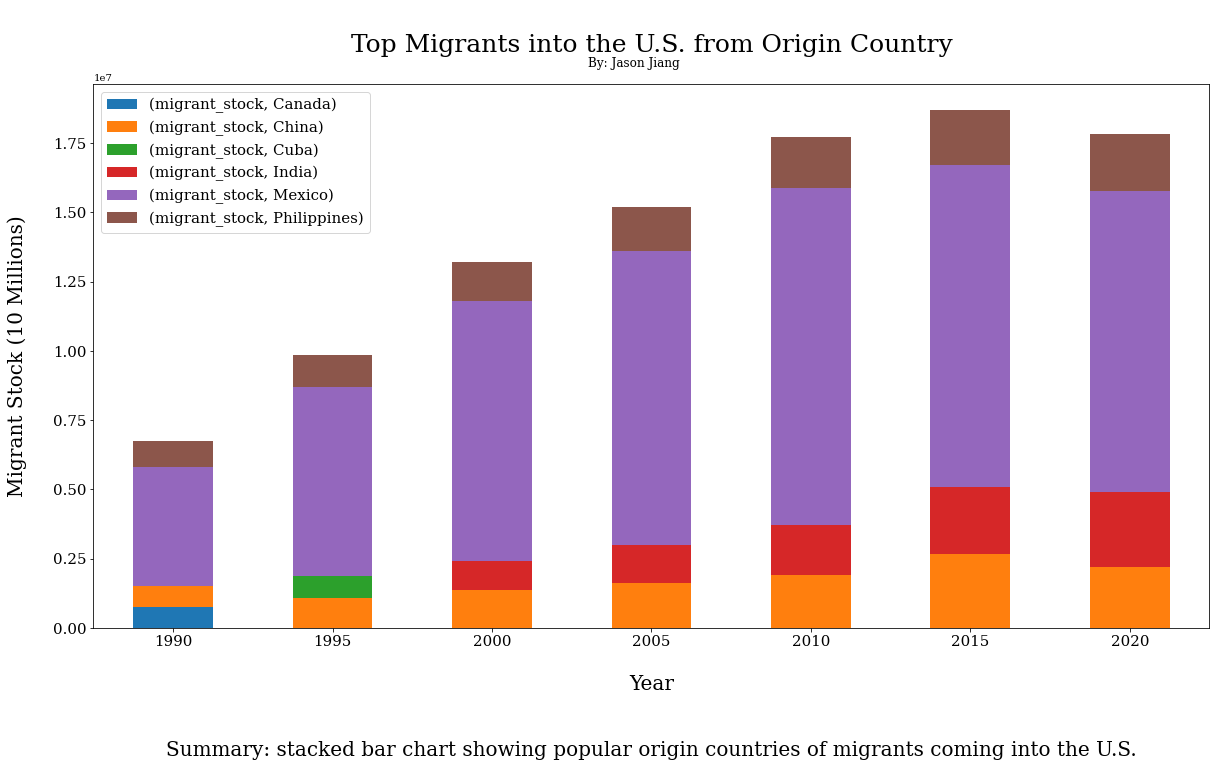

In [ ]:
#@title
us_migrants.unstack().plot(kind='bar', stacked=True, figsize=(20,10))

plt.xlabel("\nYear\n\n\nSummary: stacked bar chart showing popular origin countries of migrants coming into the U.S.", 
           fontsize=20)
plt.xticks(fontsize=15, rotation=0)

plt.ylabel("Migrant Stock (10 Millions)\n", fontsize=20)
plt.yticks(fontsize=15)

plt.title("\nTop Migrants into the U.S. from Origin Country\n", fontsize=25)
plt.suptitle("\n\n\nBy: Jason Jiang\n\n")

plt.legend(fontsize=15)

plt.show()

In [ ]:
#@title
fig = px.scatter(select_countries, x="Current GDP ($)", y=select_countries.index, color="Year",
                 title="Current GDP Disparity by Country<br><sup>By: Jason Jiang</sup>", 
                 color_continuous_scale='Tealgrn'
                )

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    width=1200,
    height=750,
    paper_bgcolor='white',
    plot_bgcolor='white',
)

fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=-0.05,
                                        y=-0.14,
                                        showarrow=False,
                                        text="Summary: Scatter graph that shows current countries GDP disparity over the years compared to the U.S.",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()

In [ ]:
#@title

fig = px.bar(select_countries, x="Year", y="Annual GDP Growth (%)", color="Annual GDP Growth (%)", 
             barmode="group", facet_col=select_countries.index, 
             title="Annual GDP Growth<br><sup>By: Jason Jiang</sup>",
             color_continuous_scale='Rdbu',
             height = 700)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")

fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=-0.01,
                                        y=-0.16,
                                        showarrow=False,
                                        text="Summary: bar graph of the annual GDP growth and shrinkage by country.",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()

In [ ]:
#@title
fig = px.bar(select_countries, x="Year", y="Population Density", color="Population Density", 
             barmode="group", facet_col=select_countries.index, 
             title="Population Density<br><sup>By: Jason Jiang</sup>",
             color_continuous_scale='YlOrRd',
             height=700)

fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")

fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=-0.01,
                                        y=-0.16,
                                        showarrow=False,
                                        text="Summary: bar graph that shows the changes in population density of each country over time.",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()

In [ ]:
#@title

fig = px.scatter(select_countries, 
                 x="Current GDP ($)", 
                 y="Annual Population Growth (%)", 
                 title="Country GDP vs Population Growth<br><sup>By: Jason Jiang</sup>",
                 color=select_countries.index,
                 width=1200,
                 height=700,
                 trendline="ols")

fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=-0.01,
                                        y=-0.16,
                                        showarrow=False,
                                        text="Summary: scatter graph with trendline showing the correlation between the country's GDP and population growth over time.",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()

## Data Visualizations: Gabriel's Section

In [74]:
#@title
# Install packages
!pip install pysankey

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
#@title
# Import packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [184]:
#@title
# Load data
url="https://github.com/angelhumano/viz_project/blob/main/UN_dest_ori_migrant_stock_2020.csv?raw=true"
df = pd.read_csv(url)

### Sankey Charts

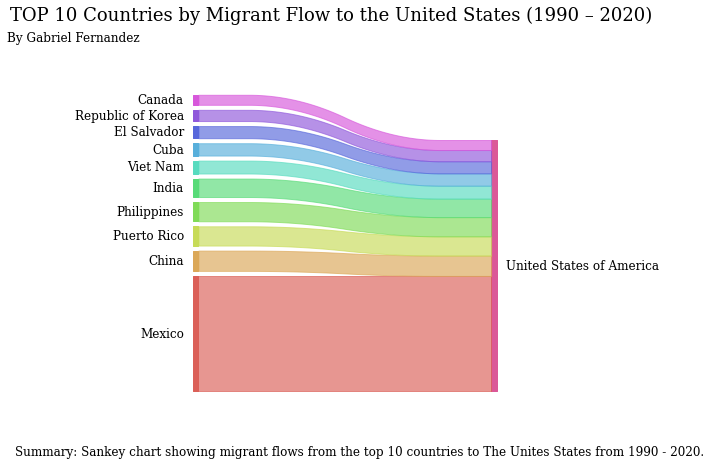

In [185]:
#@title

#Sankey for US as destination
df_clean = df.groupby(['destination', 'origin'])['migrant_stock'].mean().reset_index()

df_eua = df_clean.loc[df_clean['destination'] == 'United States of America'] \
  .sort_values('migrant_stock', ascending = False).head(10)
df_use = df_eua

# Sankey chart


a = sankey(df_use["origin"], 
       df_use["destination"], 
       rightWeight=df_use['migrant_stock'].values,
       leftWeight=df_use['migrant_stock'].values, 
       fontsize=12)

plt.suptitle("TOP 10 Countries by Migrant Flow to the United States (1990 – 2020)\n\n", y=1.05, x = 0.48, fontsize=18)
plt.title("By Gabriel Fernandez", fontsize=12, y=1.10, x = - 0.31)

txt="Summary: Sankey chart showing migrant flows from the top 10 countries to The Unites States from 1990 - 2020."
plt.figtext(-0.25, 0.01, txt, wrap=True, fontsize=12)
plt.show()


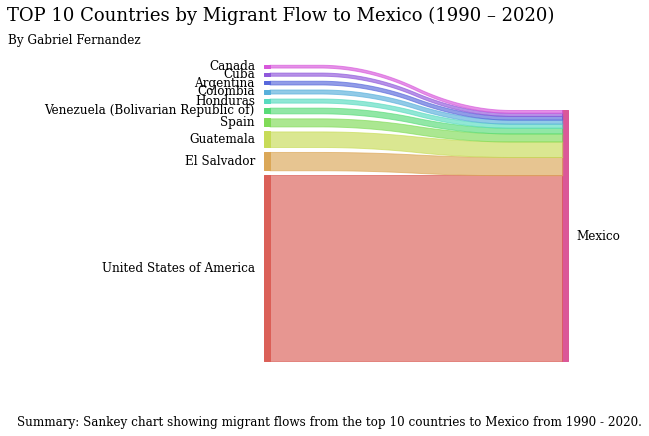

In [186]:
#@title
#Sankey for Mexico as destination
df_clean = df.groupby(['destination', 'origin'])['migrant_stock'].mean().reset_index()

df_eua = df_clean.loc[df_clean['destination'] == 'Mexico'] \
  .sort_values('migrant_stock', ascending = False).head(10)
df_use = df_eua

# Sankey chart


a = sankey(df_use["origin"], 
       df_use["destination"], 
       rightWeight=df_use['migrant_stock'].values,
       leftWeight=df_use['migrant_stock'].values, 
       fontsize=12)

plt.suptitle("TOP 10 Countries by Migrant Flow to Mexico (1990 – 2020)\n\n",x = 0.20, fontsize=18)
plt.title("By Gabriel Fernandez", fontsize=12, y=1, x = -0.52)

txt="Summary: Sankey chart showing migrant flows from the top 10 countries to Mexico from 1990 - 2020."
plt.figtext(-0.41, 0.01, txt, wrap=True, fontsize=12)
plt.show()


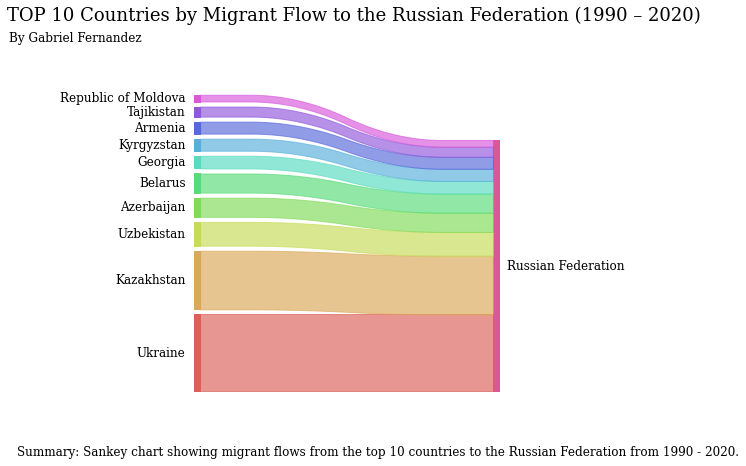

In [187]:
#@title

#Sankey for Russia as destination
df_clean = df.groupby(['destination', 'origin'])['migrant_stock'].mean().reset_index()

df_eua = df_clean.loc[df_clean['destination'] == 'Russian Federation'] \
  .sort_values('migrant_stock', ascending = False).head(10)
df_use = df_eua

# Sankey chart


a = sankey(df_use["origin"], 
       df_use["destination"], 
       rightWeight=df_use['migrant_stock'].values,
       leftWeight=df_use['migrant_stock'].values, 
       fontsize=12)

plt.suptitle("TOP 10 Countries by Migrant Flow to the Russian Federation (1990 – 2020)\n\n", y=1.05, x = 0.53, fontsize=18)
plt.title("By Gabriel Fernandez", fontsize=12, y=1.10, x = - 0.31)

txt="Summary: Sankey chart showing migrant flows from the top 10 countries to the Russian Federation from 1990 - 2020."
plt.figtext(-0.25, 0.01, txt, wrap=True, fontsize=12)
plt.show()

plt.show()

### Slope Charts


In [237]:
#@title

# For top five destinations
# Load data
url_d="https://github.com/angelhumano/viz_project/blob/main/destination_total.csv?raw=true"
df = pd.read_csv(url_d)
df.head(5)

,destination,year,migrant_stock
0,Afghanistan,1990,50671
1,Afghanistan,1995,55794
2,Afghanistan,2000,60918
3,Afghanistan,2005,67045
4,Afghanistan,2010,73174


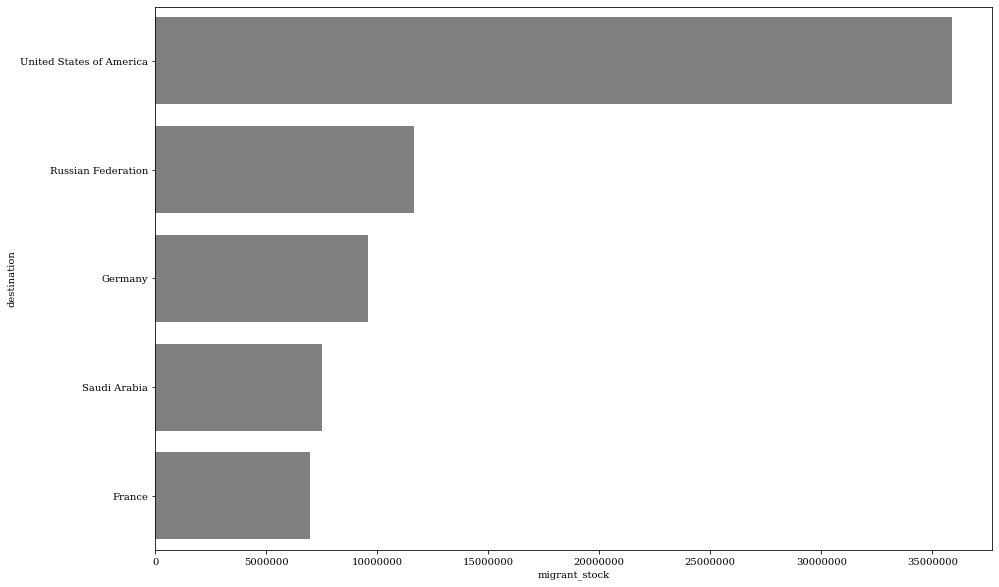

In [238]:
#@title
# Top 5 destiantion countries by migrant stock

plt.figure(figsize=(15,10))
d =df.groupby('destination').agg({'migrant_stock': 'mean'})
d =d.sort_values(by='migrant_stock', ascending= False).head(5)
sns.barplot(data = d, y = d.index, x="migrant_stock", color= "gray")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

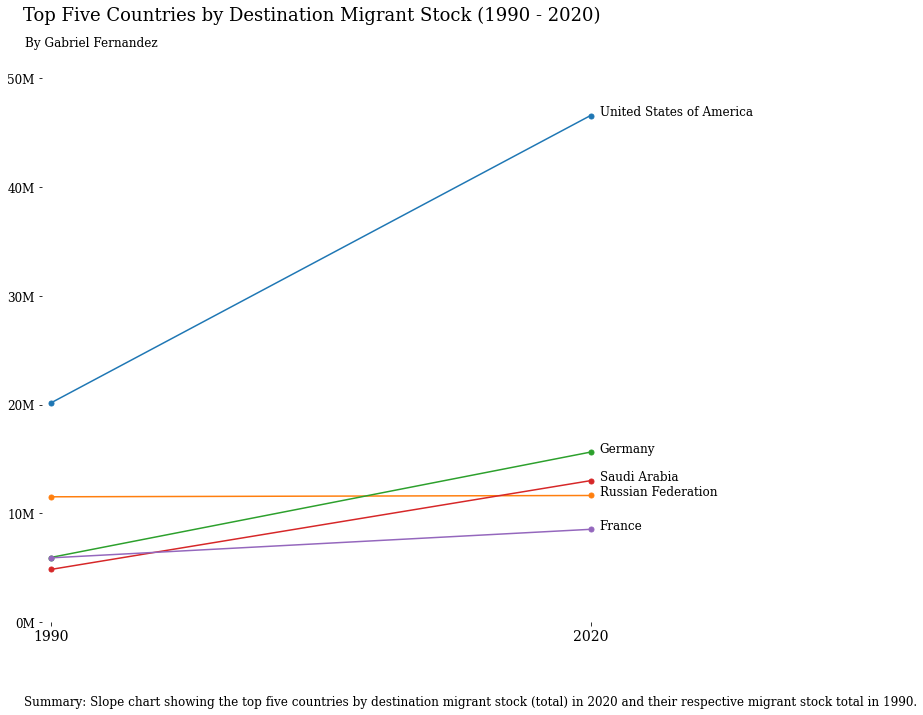

In [239]:
#@title
countries = list(d.index)
fig, ax = plt.subplots(1, figsize=(10,10))
for i in countries:
    # get a single country from the list
    temp = df[df['destination'] == i]
    # plot the lines
    plt.plot(temp.year.iloc[[0,6]], temp.migrant_stock.iloc[[0,6]], marker='o',markersize=5)
  
    # end label
    plt.text(temp.year.values[6]+0.5, temp.migrant_stock.values[6], i, fontsize=12)
    # start label
    # plt.text(temp.year.values[0] - 0.5, temp.migrant_stock.values[0], i, ha='right')
    
# x limits, x ticks, and y label 
plt.xlim(1989.5,2020.5)
plt.xticks([1990, 2020])
plt.xticks(fontsize=14)

# get y ticks, replace 1,000 with k, and draw the ticks
yticks = plt.yticks()[0]
plt.yticks(yticks, [f"{(i/1000000):n}M" for i in yticks])
plt.yticks(fontsize=12)
# remove all the spines of the axes
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")

plt.suptitle("Top Five Countries by Destination Migrant Stock (1990 - 2020)\n\n", fontsize=18)
plt.title("By Gabriel Fernandez\n", fontsize=12, loc ="left", y = 1.02, x = -0.03)

txt="Summary: Slope chart showing the top five countries by destination migrant stock (total) in 2020 and their respective migrant stock total in 1990."
plt.figtext(0.10, 0.01, txt, wrap=True, fontsize=12)
plt.show()

In [255]:
#@title

# For top five origin

# Load data
url_o="https://github.com/angelhumano/viz_project/blob/main/origin_total.csv?raw=true"
df_o = pd.read_csv(url_o)
df_o.head(5)

,origin,year,migrant_stock
0,Afghanistan,1990,7679582
1,Afghanistan,1995,4347049
2,Afghanistan,2000,4750677
3,Afghanistan,2005,4116739
4,Afghanistan,2010,5269518


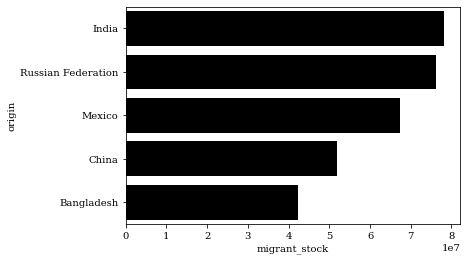

In [256]:
#@title
# Top 5 origin countries by migrant stock
o =df_o.groupby('origin').agg({'migrant_stock': 'sum'})
o =o.sort_values(by='migrant_stock', ascending= False).head(5)
sns.barplot(data = o, y = o.index, x="migrant_stock", color= "black")
plt.show()

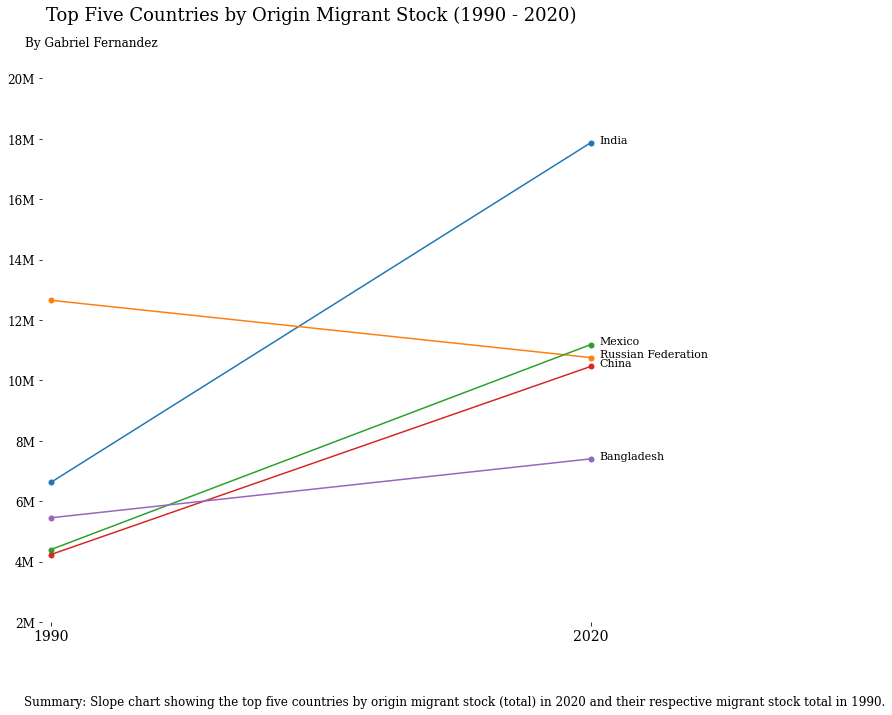

In [271]:
#@title
countries = list(o.index)
fig, ax = plt.subplots(1, figsize=(10,10))
for i in countries:
    # get a single country from the list
    temp = df_o[df_o['origin'] == i]
    # plot the lines
    plt.plot(temp.year.iloc[[0,6]], temp.migrant_stock.iloc[[0,6]], marker='o',markersize=5)
  
    # end label
    plt.text(temp.year.values[6]+0.5, temp.migrant_stock.values[6], i, fontsize=11)
    # start label
    # plt.text(temp.year.values[0] - 0.5, temp.migrant_stock.values[0], i, ha='right')
    
# x limits, x ticks, and y label 
plt.xlim(1989.5,2020.5)
plt.xticks([1990, 2020])
plt.xticks(fontsize=14)

# get y ticks, replace 1,000 with k, and draw the ticks
yticks = plt.yticks()[0]


plt.yticks(yticks, [f"{(i/1000000):n}M" for i in yticks])

plt.yticks(fontsize=12)
# remove all the spines of the axes
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")

plt.suptitle("Top Five Countries by Origin Migrant Stock (1990 - 2020)\n\n", fontsize=18)
plt.title("By Gabriel Fernandez\n", fontsize=12, loc ="left", y = 1.02, x = -0.03)

txt="Summary: Slope chart showing the top five countries by origin migrant stock (total) in 2020 and their respective migrant stock total in 1990."
plt.figtext(0.10, 0.01, txt, wrap=True, fontsize=12)
plt.show()

## Tableau portion 

[Go to Tableau Public](https://)